<h1 style="color:#F01AC6;font-family:verdana;font-size:40px"> Finance: Fraud Estimation </h1>

<a id='main'> </a>

 - <h2 style="color:blue"> Exploratory Data Analysis </h2>   
 - <h2 style="color:blue"> ML Approach </h2>     
 - <h2 style="color:blue"> ANN Approach </h2> 
 - <h2 style='color:blue'> Anamoly Detection </h2> 
 - <h2 style='color:blue'> Summary </h2> 

 - [for Exploratory Data Analysis, see here](#EDA)
 - [for ML Approach see here](#ML)
 - [for ANN Approach see here](#ANN)
 - [for Anamoly Detection see here](#anamoly)
 - [for Summary see here](#summary)  

<a id='EDA'> </a>

<h2 style="color:blue;font-size:20px;font-family:verdana"> Exploratory Data Analysis </h2>

In [ ]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
sns.set(color_codes=True)
import functools
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score , precision_score, recall_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score , precision_score, recall_score
from datetime import datetime

#### load datasets

In [ ]:
test=pd.read_csv("test_data.csv",header=0,engine="python")
train=pd.read_csv("train_data.csv",header=0,engine="python")
test_hide=pd.read_csv("test_data_hidden.csv",header=0,engine="python")

In [ ]:
train.shape,test.shape,test_hide.shape

((227845, 31), (56962, 30), (56962, 31))

In [ ]:
EDA_data=pd.concat([train,test_hide],sort=False,axis=0)

In [ ]:
EDA_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
target=EDA_data.loc[:,"Class"]
EDA_data.drop("Class",axis=1,inplace=True) # remove target from dataframe
EDA_data.shape

(284807, 30)

#### Exploratory Data Analysis

In [ ]:
# Characteristics of the Data
data_type=EDA_data.dtypes.reset_index()
data_type.columns=["count","column_type"]
data_type.groupby("column_type").aggregate("count").reset_index()

,column_type,count
0,float64,30


In [ ]:
# check for null values in the data
EDA_data.isnull().sum().sort_values(ascending=False)   # no null values in dataset

Amount    0
V28       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
Time      0
dtype: int64

##### <font color=blue> Class counts </font>

In [ ]:
target.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
print("% of frauds")
print((492/284315)*100)

% of frauds
0.17304750013189596


#### the data shows that this is an imbalanced dataset

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
print(EDA_data.describe())

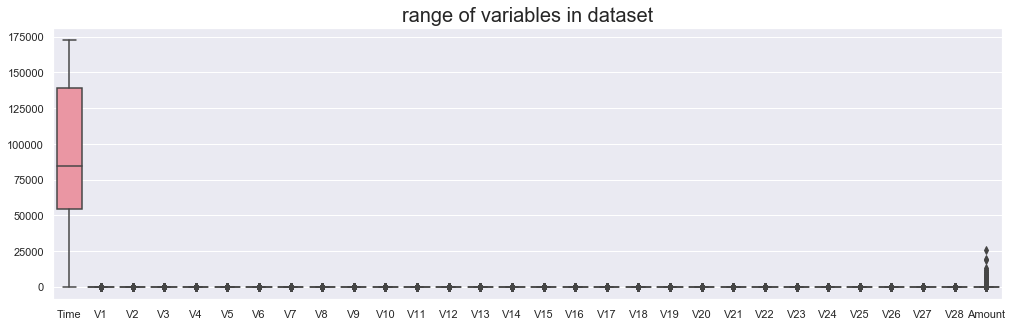

In [ ]:
plt.figure(figsize=(17,5))
sns.boxplot(data=EDA_data)
plt.title("range of variables in dataset",fontsize=20)
plt.show() 

##### outliers not detected

In [ ]:
std_dev=EDA_data.std()
mean=EDA_data.mean()
stats=pd.concat([mean,std_dev],axis=1)
stats.columns=["mean","std_dev"]
stats

,mean,std_dev
Time,9.481386e+04,47488.145955
V1,1.254334e-15,1.958696
V2,3.284651e-16,1.651309
V3,-1.400675e-15,1.516255
V4,2.053948e-15,1.415869
V5,1.020816e-15,1.380247
V6,1.497614e-15,1.332271
V7,-5.772893e-16,1.237094
V8,1.195394e-16,1.194353
V9,-2.420241e-15,1.098632


##### getting a randomized subset of data for analysis

In [ ]:
random_set=EDA_data.iloc[np.random.permutation(EDA_data.shape[0]),:]
subset=random_set.iloc[:5000,:]

###### <font color = blue>scaling the data </font>

In [ ]:
# scaling the data
scaler=StandardScaler()
scale_subset=scaler.fit_transform(subset)
scale_subset=pd.DataFrame(scale_subset)
scale_subset.columns=subset.columns

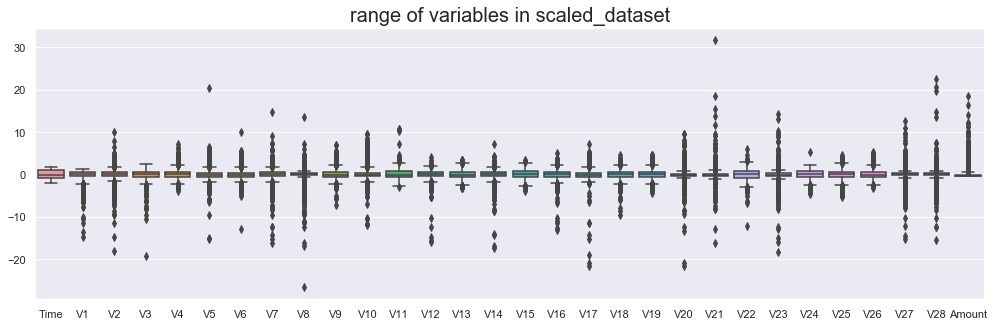

In [ ]:
plt.figure(figsize=(17,5))
sns.boxplot(data=scale_subset)
plt.title("range of variables in scaled_dataset",fontsize=20)
plt.show() 

###### <font color = blue> removal of outliers </font>

In [ ]:
z = np.abs(stats.zscore(scale_subset))
print(z)

[[0.76623027 0.20590573 0.32527169 ... 0.02055235 0.28125586 0.38841988]
 [1.35982345 0.62114232 0.08772422 ... 0.04243525 0.05314322 0.29410349]
 [0.39997559 0.61819936 0.1716068  ... 0.03199791 0.06846367 0.38841988]
 ...
 [0.48170163 1.0246404  0.02985696 ... 0.18818093 0.13793063 0.38929105]
 [0.79450748 0.54845566 0.41641387 ... 0.15322024 0.02123435 0.06759745]
 [0.15769053 0.57991597 0.91787908 ... 0.21780464 0.05649434 0.39360109]]


In [ ]:
threshold=3
print(np.where(z>3))

(array([   7,   14,   14, ..., 4989, 4993, 4995], dtype=int64), array([25, 25, 27, ..., 21, 25, 28], dtype=int64))


In [ ]:
correct_subset= scale_subset[(z<3).all(axis=1)]

In [ ]:
correct_subset.shape, scale_subset.shape

((4356, 30), (5000, 30))

###### <font color = blue> distribution of variables </font>

Text(0.5, 1, 'heatmap showing correlation between features')

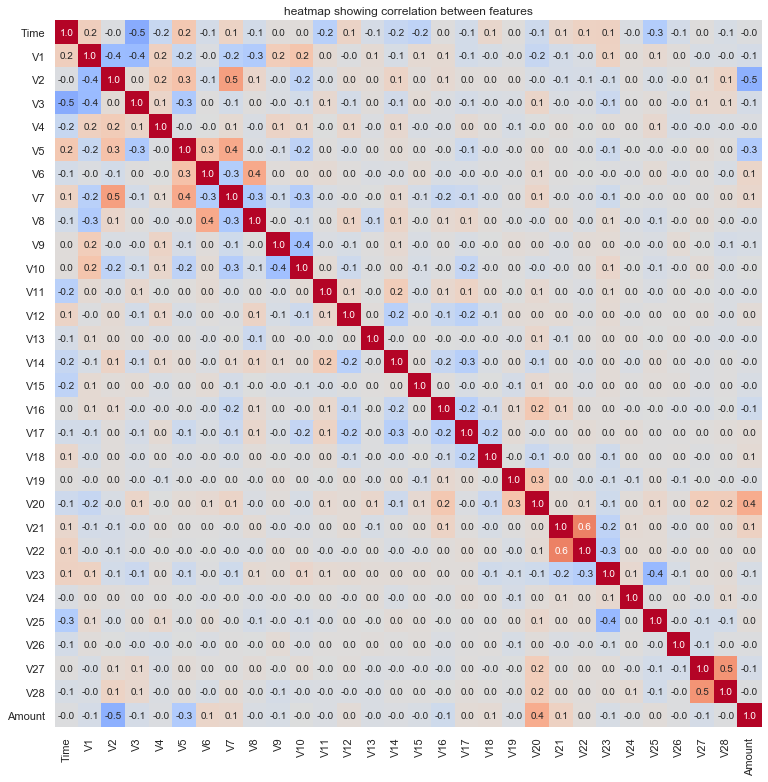

In [ ]:
EDA_corr=correct_subset.corr()
plt.figure(figsize=(13,13))
sns.heatmap(EDA_corr,vmin=-1.0,vmax=1.0,cmap='coolwarm',robust=True,square=True,annot=True,fmt="0.1f",annot_kws={'size':10},cbar=False)
plt.title("heatmap showing correlation between features")

##### <font color=green> relationship between Time,Amount and Transaction being fraudulent </font>

In [ ]:
EDA_data=pd.concat([train,test_hide],sort=False,axis=0)

In [ ]:
random_set_2=EDA_data.iloc[np.random.permutation(EDA_data.shape[0]),:]

In [ ]:
random_set_2=random_set_2.loc[:,('Time','Amount','Class')]
random_set_2=random_set_2[:6000]

In [ ]:
random_set_2[random_set_2.Class==1]

,Time,Amount,Class
120837,94952.0,571.48,1
153909,50706.0,99.99,1
187289,110552.0,80.22,1
8747,53451.0,8.00,1
22062,139816.0,0.69,1
149107,40918.0,0.76,1
117500,128519.0,93.35,1
215296,86376.0,323.77,1
148153,148468.0,0.76,1
51109,95628.0,1.63,1


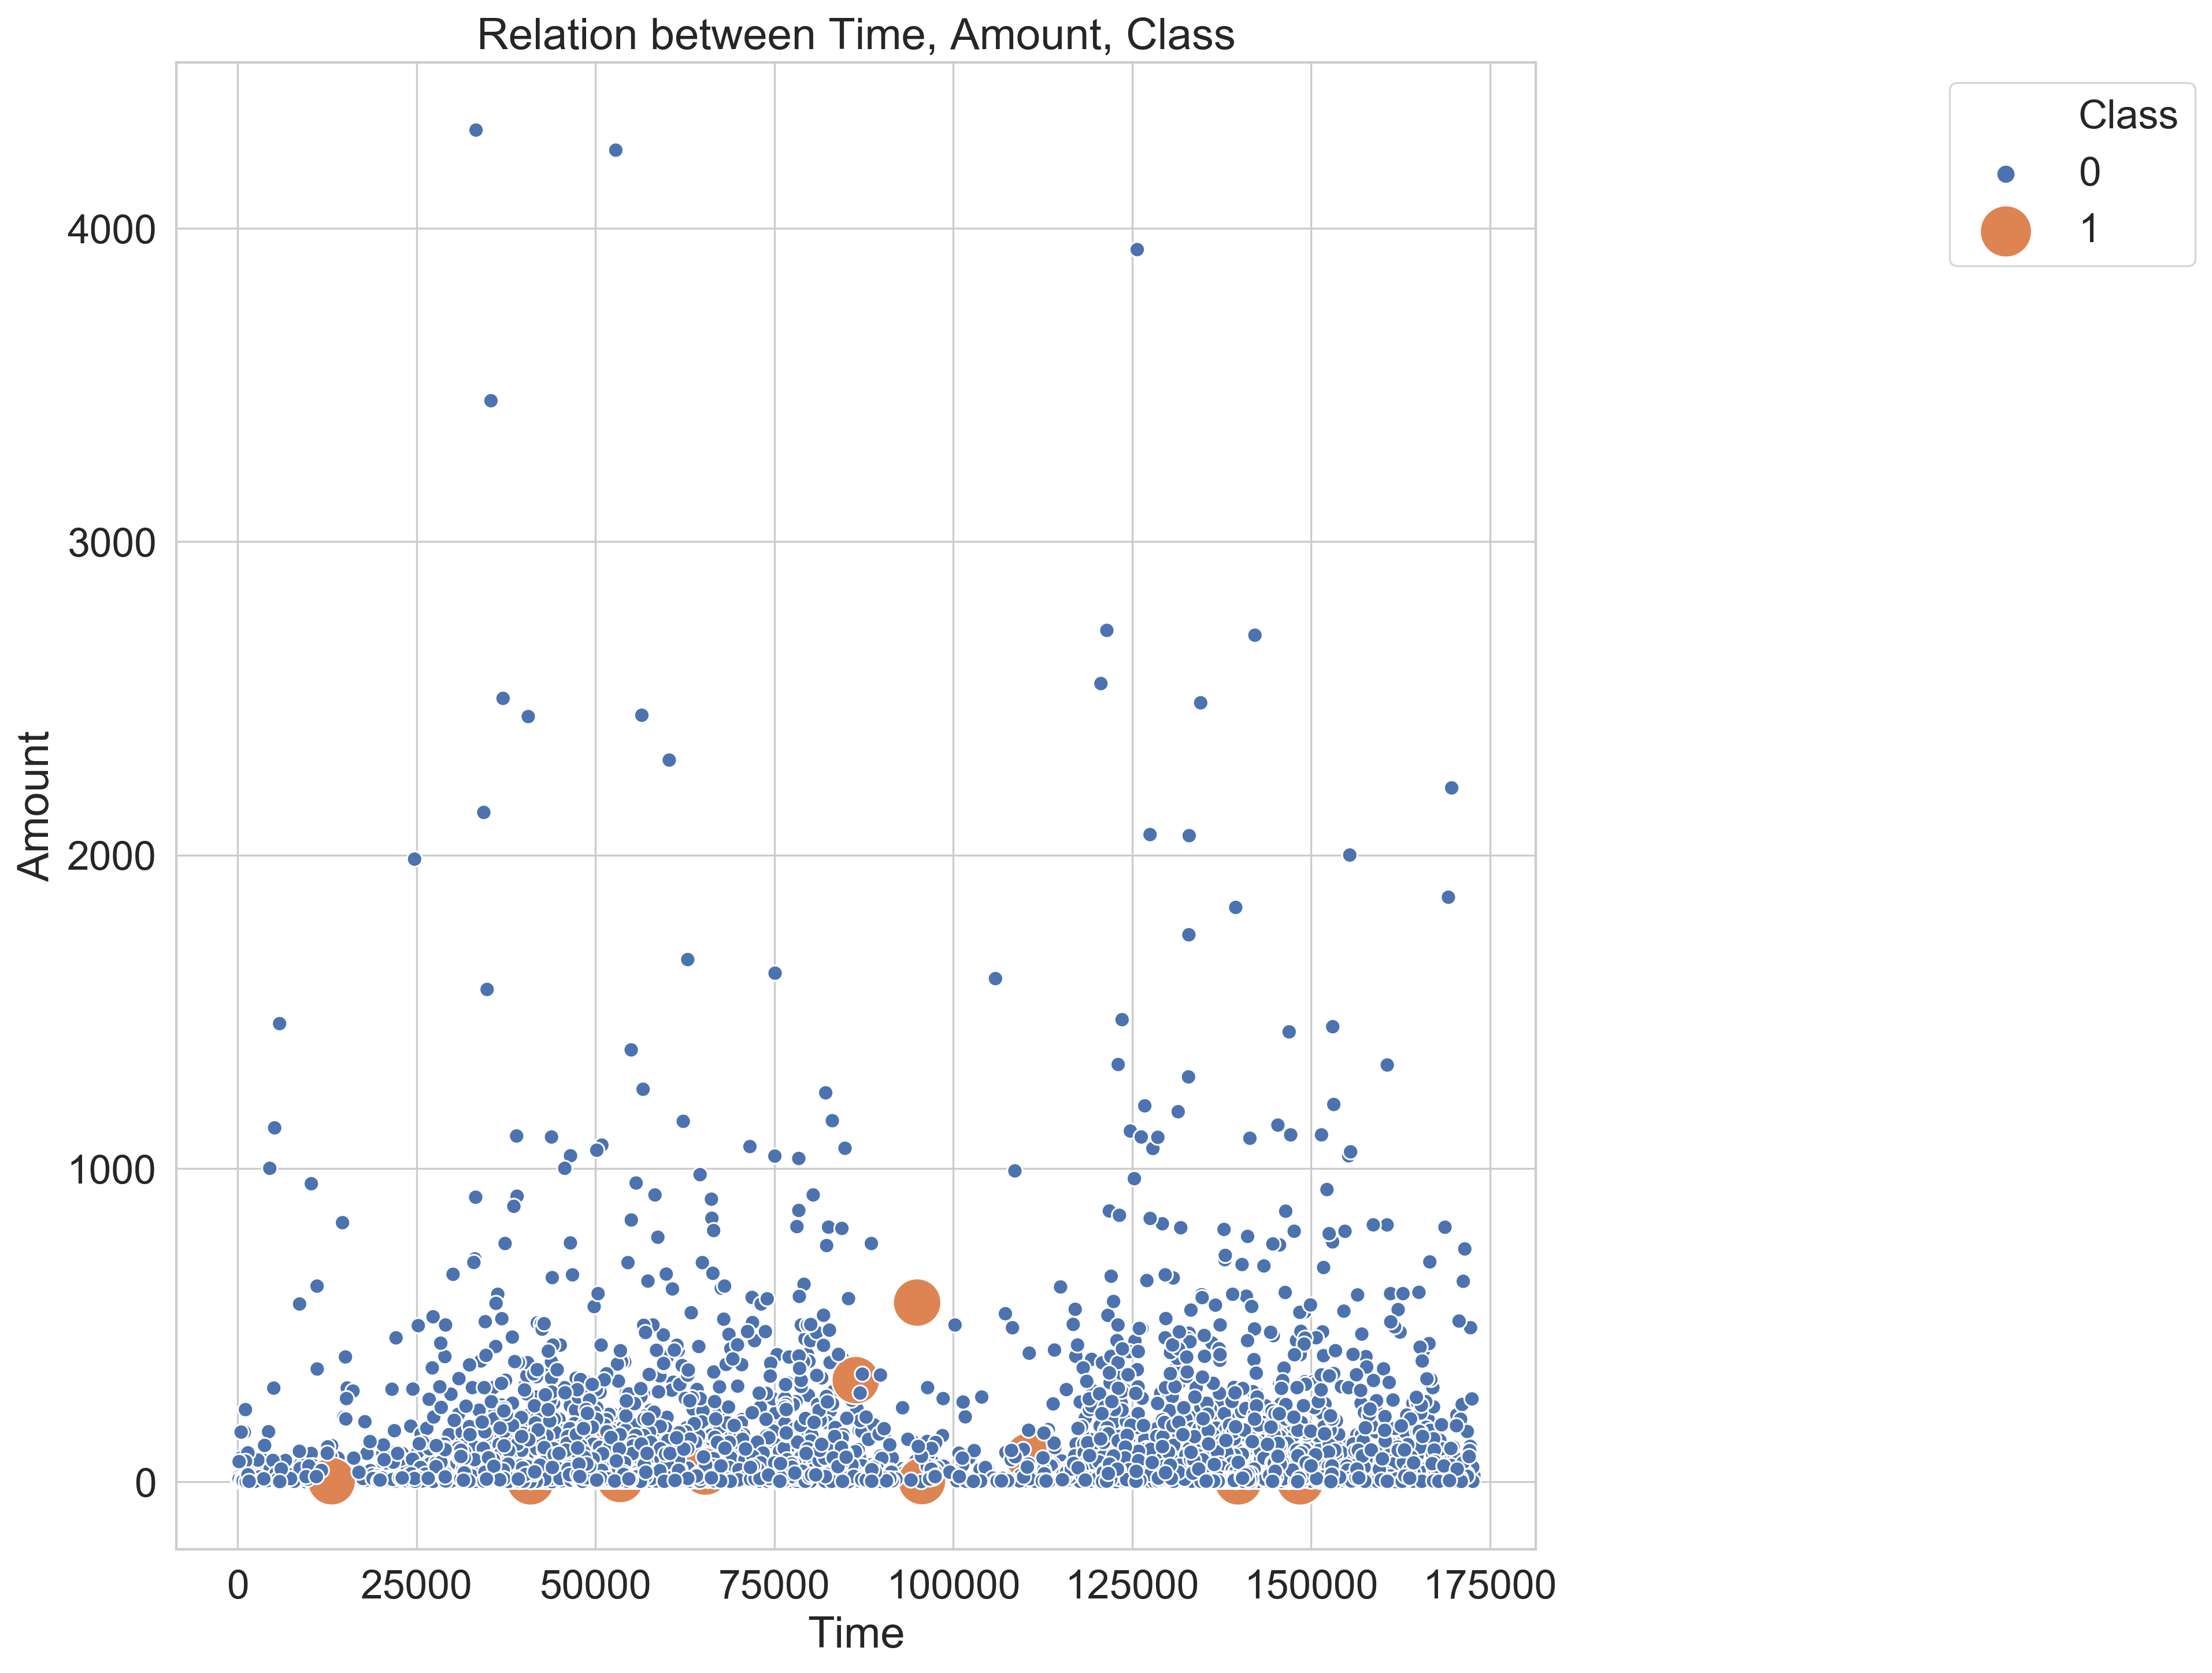

In [ ]:
sns.set(font_scale=2)
plt.rcParams['figure.figsize']=(15,10)# this sets figure of 15 inch X 10 inch, also can be done by plt.figsize
text_scaling=1.9
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=text_scaling) 
fig,ax=plt.subplots()
#big_ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # actual area of the chart .Here it is 0.8 X 0.8
ax = sns.scatterplot(x='Time', y='Amount', hue='Class',size='Class',sizes=(400,40),data=random_set_2)
plt.legend(bbox_to_anchor=(1.5,1),loc="best")
ax.locator_params(integer=True) # axis as integers only
var2=ax.set_ylabel('Amount')
plt.title('Relation between Time, Amount, Class')
plt.tight_layout()

### Summary

<h3 style="color:blue;font-style:verdana;font-size:20px"> The data is imbalanced. most of the fraud transactions are low value transactions and occur uniformly throughout the day. The high value fraud transactions occur at time 100000 </h3>

<a id='ML'> </a>

<h2 style="color:blue;font-size:30px;font-family:verdana"> Classification using ML Models </h2>

[click here to go to main menu](#main)

In [ ]:
train=pd.read_csv("train.csv",header=0,engine="python")
test=pd.read_csv("test.csv",header=0,engine="python")

In [ ]:
train.shape,test.shape

((5000, 32), (5000, 32))

In [ ]:
train=train.iloc[:,1:32]
test=test.iloc[:,1:32]
train.shape,test.shape

((5000, 30), (5000, 30))

In [ ]:
import imblearn

In [ ]:
y_train=train.loc[:,"Class"]
X_train=train.drop(["Class"],axis=1)
X_train.shape,y_train.shape

((5000, 29), (5000,))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler(random_state=0)
X_under,y_under=rs.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=0)
X_ov_smp,y_ov_smp=smt.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_ov_smp=pd.DataFrame(X_ov_smp)
X_ov_smp.columns=X_train.columns

In [ ]:
from collections import Counter
print(f'training class 0: {Counter(y_train)[0]} 1: {Counter(y_train)[1]}, ',f'oversampled class 0: {Counter(y_ov_smp)[0]} 1: {Counter(y_ov_smp)[1]}, ',f'undersampled class 0: {Counter(y_under)[0]} 1: {Counter(y_under)[1]}')

training class 0: 4994 1: 6,  oversampled class 0: 4994 1: 4994,  undersampled class 0: 6 1: 6


In [ ]:
y_test=test.loc[:,'Class']
test.drop('Class',axis=1,inplace=True)

In [ ]:
test.shape,y_test.shape

((5000, 29), (5000,))

In [ ]:
X_ov_smp.shape,y_ov_smp.shape

((9988, 29), (9988,))

In [ ]:
X_under.shape,y_under.shape

((12, 29), (12,))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
scaler=StandardScaler()
scaled_under=scaler.fit_transform(X_under)
scaled_over=scaler.fit_transform(X_ov_smp)
scaled_train=scaler.fit_transform(X_train)

In [ ]:
scaled_under=pd.DataFrame(scaled_under)
scaled_over=pd.DataFrame(scaled_over)
scaled_train=pd.DataFrame(scaled_train)

In [ ]:
scaled_under.columns=X_train.columns
scaled_over.columns=X_train.columns
scaled_train.columns=X_train.columns

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
nx_train=normalize(X_train)
nx_train=pd.DataFrame(nx_train)
nx_train.columns=X_train.columns
nx_train.shape

(5000, 29)

In [ ]:
### Oversamoled normalized data

In [ ]:
nov_xtrain=normalize(X_ov_smp)
nov_xtrain=pd.DataFrame(nov_xtrain)
nov_xtrain.columns=X_train.columns
nov_xtrain.shape

(9988, 29)

In [ ]:
# timer function
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
data=[(X_train,y_train,'original'),(nx_train,y_train,'original normalized'),(scaled_train,y_train,'original scaled'),(X_under,y_under,'undersampled'),(X_ov_smp,y_ov_smp,'oversampled'),(scaled_over,y_ov_smp,'oversampled scaled'),(nov_xtrain,y_ov_smp,'oversampled normalized')]

In [ ]:
for item in data:
  print(item[2])
  print(item[0].shape)
  print(item[1].shape)

original
(5000, 29)
(5000,)
original normalized
(5000, 29)
(5000,)
original scaled
(5000, 29)
(5000,)
undersampled
(12, 29)
(12,)
oversampled
(9988, 29)
(9988,)
oversampled scaled
(9988, 29)
(9988,)
oversampled normalized
(9988, 29)
(9988,)


<h3 style="color:green;font-style:verdana;font-size:15px"> Gaussian Naive Bayes Model </h3>

In [ ]:
param = [{'var_smoothing':[1e-11,1e-10,1e-9]}]
scores=['roc_auc','f1','precision','recall']
NB_clf=GaussianNB()

In [ ]:
start_time=timer(None)

for entry in data:
  print("GaussianNB model")
  print(entry[2])
  X=entry[0]
  y=entry[1]
  print(X_train.shape)
  print(y_train.shape)
  for score in scores:    
      model=GridSearchCV(NB_clf,param_grid=param,cv=5,scoring=score,verbose=1)
      model.fit(X_train,y_train)
      print(score)    
      print()
      print(model.best_params_)
      print(model.best_score_)
      y_true, y_pred = y_test, model.predict(test)
      print()
      print(classification_report(y_true, y_pred))
      print()       
timer(start_time)    

GaussianNB model
original
(5000, 30)
(5000,)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

    accuracy                           1.00      5000
   macro avg       0.65      1.00      0.73      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done  15 out of

f1

{'var_smoothing': 1e-09}
0.4444444444444445

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits
precision

{'var_smoothing': 1e-09}
0.425

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'var_smoothing': 1e-11}
0.7

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000


GaussianNB model
original normalized
(5000, 30)
(5000,)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

    accuracy                           1.00      5000
   macro avg       0.65      1.00      0.73      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'var_smoothing': 1e-09}
0.4444444444444445

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits
precision

{'var_smoothing': 1e-09}
0.425

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'var_smoothing': 1e-11}
0.7

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000


GaussianNB model
original scaled
(5000, 30)
(5000,)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

    accuracy                           1.00      5000
   macro avg       0.65      1.00      0.73      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'var_smoothing': 1e-09}
0.4444444444444445

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits
precision

{'var_smoothing': 1e-09}
0.425

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'var_smoothing': 1e-11}
0.7

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000


GaussianNB model
undersampled
(5000, 30)
(5000,)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

    accuracy                           1.00      5000
   macro avg       0.65      1.00      0.73      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'var_smoothing': 1e-09}
0.4444444444444445

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits
precision

{'var_smoothing': 1e-09}
0.425

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'var_smoothing': 1e-11}
0.7

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000


GaussianNB model
oversampled
(5000, 30)
(5000,)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

    accuracy                           1.00      5000
   macro avg       0.65      1.00      0.73      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'var_smoothing': 1e-09}
0.4444444444444445

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits
precision

{'var_smoothing': 1e-09}
0.425

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'var_smoothing': 1e-11}
0.7

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000


GaussianNB model
oversampled scaled
(5000, 30)
(5000,)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

    accuracy                           1.00      5000
   macro avg       0.65      1.00      0.73      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'var_smoothing': 1e-09}
0.4444444444444445

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits
precision

{'var_smoothing': 1e-09}
0.425

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'var_smoothing': 1e-11}
0.7

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000


GaussianNB model
oversampled normalized
(5000, 30)
(5000,)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

    accuracy                           1.00      5000
   macro avg       0.65      1.00      0.73      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'var_smoothing': 1e-09}
0.4444444444444445

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits
precision

{'var_smoothing': 1e-09}
0.425

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 3 candidates, totalling 15 fits
recall

{'var_smoothing': 1e-11}
0.7

              precision    recall  f1-score   support

           0       1.00      1.00      

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


<h3 style="color:green;font-style:verdana;font-size:15px"> Logistic Regression Model</h3>

In [ ]:
param = {'penalty':['l1','l2'], 'C':[1.0,2.0,10.0], 'max_iter':[100,1000]}
scores=['roc_auc','f1','recall']
logreg_clf=LogisticRegression(solver='liblinear')

In [ ]:
start_time=timer(None)
for entry in data:
  print("Logistic Regression")
  print(entry[2])
  X=entry[0]
  y=entry[1]
  print(X_train.shape)
  print(y_train.shape)
  for score in scores:    
      model=GridSearchCV(logreg_clf,param_grid=param,cv=5,scoring=score,verbose=1)
      model.fit(X,y)
      print(score)    
      print()
      print(model.best_params_)
      print(model.best_score_)
      y_true, y_pred = y_test, model.predict(test)
      print()
      print(classification_report(y_true, y_pred))
      print()       
timer(start_time)    

Logistic Regression
original
(5000, 30)
(5000,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


roc_auc

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
0.993993793392591

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.75      0.67      0.71         9

    accuracy                           1.00      5000
   macro avg       0.87      0.83      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'C': 2.0, 'max_iter': 100, 'penalty': 'l1'}
0.5333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.70      0.78      0.74         9

    accuracy                           1.00      5000
   macro avg       0.85      0.89      0.87      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'C': 2.0, 'max_iter': 100, 'penalty': 'l1'}
0.6

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.70      0.78      0.74         9

    accuracy                           1.00      5000
   macro avg       0.85      0.89      0.87      5000
weighted avg       1.00      1.00      1.00      5000


Logistic Regression
original normalized
(5000, 30)
(5000,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   15.0s finished


roc_auc

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
0.5

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   14.4s finished


f1

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   14.4s finished


recall

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Logistic Regression
original scaled
(5000, 30)
(5000,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


roc_auc

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
0.9961961961961961

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      4991
           1       0.01      1.00      0.01         9

    accuracy                           0.68      5000
   macro avg       0.50      0.84      0.41      5000
weighted avg       1.00      0.68      0.81      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2'}
0.4

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4991
           1       0.00      1.00      0.00         9

    accuracy                           0.00      5000
   macro avg       0.50      0.50      0.00      5000
weighted avg       1.00      0.00      0.00      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
0.4

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      4991
           1       0.01      1.00      0.01         9

    accuracy                           0.68      5000
   macro avg       0.50      0.84      0.41      5000
weighted avg       1.00      0.68      0.81      5000


Logistic Regression
undersampled
(5000, 30)
(5000,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
roc_auc

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
1.0

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4991
           1       0.03      1.00      0.06         9

    accuracy                           0.94      5000
   macro avg       0.52      0.97      0.52      5000
weighted avg       1.00      0.94      0.97      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2'}
1.0

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4991
           1       0.05      1.00      0.09         9

    accuracy                           0.96      5000
   macro avg       0.52      0.98      0.53      5000
weighted avg       1.00      0.96      0.98      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits
recall

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2'}
1.0

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4991
           1       0.05      1.00      0.09         9

    accuracy                           0.96      5000
   macro avg       0.52      0.98      0.53      5000
weighted avg       1.00      0.96      0.98      5000


Logistic Regression
oversampled
(5000, 30)
(5000,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


roc_auc

{'C': 1.0, 'max_iter': 1000, 'penalty': 'l1'}
0.9999436874311749

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.36      1.00      0.53         9

    accuracy                           1.00      5000
   macro avg       0.68      1.00      0.76      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    7.6s finished


f1

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
0.9990000993501743

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.47      1.00      0.64         9

    accuracy                           1.00      5000
   macro avg       0.74      1.00      0.82      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    8.1s finished


recall

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.47      1.00      0.64         9

    accuracy                           1.00      5000
   macro avg       0.74      1.00      0.82      5000
weighted avg       1.00      1.00      1.00      5000


Logistic Regression
oversampled scaled
(5000, 30)
(5000,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


roc_auc

{'C': 10.0, 'max_iter': 100, 'penalty': 'l1'}
0.9999270541813085

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'C': 2.0, 'max_iter': 100, 'penalty': 'l1'}
0.9993998996496746

              precision    recall  f1-score   support

           0       1.00      0.22      0.36      4991
           1       0.00      1.00      0.00         9

    accuracy                           0.22      5000
   macro avg       0.50      0.61      0.18      5000
weighted avg       1.00      0.22      0.36      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
1.0

              precision    recall  f1-score   support

           0       1.00      0.38      0.55      4991
           1       0.00      1.00      0.01         9

    accuracy                           0.38      5000
   macro avg       0.50      0.69      0.28      5000
weighted avg       1.00      0.38      0.55      5000


Logistic Regression
oversampled normalized
(5000, 30)
(5000,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase th

roc_auc

{'C': 10.0, 'max_iter': 1000, 'penalty': 'l1'}
0.7134907425434426

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4991
           1       0.00      1.00      0.00         9

    accuracy                           0.00      5000
   macro avg       0.00      0.50      0.00      5000
weighted avg       0.00      0.00      0.00      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase th

f1

{'C': 10.0, 'max_iter': 1000, 'penalty': 'l1'}
0.6877980469686928

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4991
           1       0.00      1.00      0.00         9

    accuracy                           0.00      5000
   macro avg       0.00      0.50      0.00      5000
weighted avg       0.00      0.00      0.00      5000


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.0min finished


recall

{'C': 10.0, 'max_iter': 1000, 'penalty': 'l1'}
0.7809657352743525

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4991
           1       0.00      1.00      0.00         9

    accuracy                           0.00      5000
   macro avg       0.00      0.50      0.00      5000
weighted avg       0.00      0.00      0.00      5000



 Time taken: 0 hours 16 minutes and 11.23 seconds.


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3 style='color:green;font-size:15px;font-style:verdana'> XGB Classifier Model </h3>

In [ ]:
param = {'max_depth':[1,2,3,6], 'learning_rate':[0.005,0.1,2.0], 'gamma':[0,1,50,1000],'n_estimators':[50,100,300]}
scores=['roc_auc','f1','precision','recall']
xgb_clf=XGBClassifier(objective='binary:logistic')

In [ ]:
start_time=timer(None)
for score in scores:    
    model=GridSearchCV(xgb_clf,param_grid=param,cv=5,scoring=score,verbose=1)
    model.fit(X_train,y_train)
    print(score)    
    print()
    print(model.best_params_)
    print(model.best_score_)
    y_true, y_pred = y_test, model.predict(test)
    print()
    print(classification_report(y_true, y_pred))
    print()       
timer(start_time)    

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  7.0min finished


roc_auc

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.9977977977977979

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.75      0.67      0.71         9

    accuracy                           1.00      5000
   macro avg       0.87      0.83      0.85      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  7.0min finished


f1

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.7333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.67      0.67      0.67         9

    accuracy                           1.00      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  7.0min finished


precision

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.7

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.67      0.67      0.67         9

    accuracy                           1.00      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  6.9min finished


recall

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.8

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.67      0.67      0.67         9

    accuracy                           1.00      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       1.00      1.00      1.00      5000



 Time taken: 0 hours 27 minutes and 50.84 seconds.


In [ ]:
start_time=timer(None)
for score in scores:    
    model=GridSearchCV(xgb_clf,param_grid=param,cv=5,scoring=score,verbose=1)
    model.fit(X_ov_smp,y_ov_smp)
    print(score)    
    print()
    print(model.best_params_)
    print(model.best_score_)
    y_true, y_pred = y_test, model.predict(test)
    print()
    print(classification_report(y_true, y_pred))
    print()       
timer(start_time)    

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 20.2min finished


roc_auc

{'gamma': 0, 'learning_rate': 2.0, 'max_depth': 6, 'n_estimators': 50}
0.9999965931897863

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.58      0.78      0.67         9

    accuracy                           1.00      5000
   macro avg       0.79      0.89      0.83      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 20.4min finished


f1

{'gamma': 0, 'learning_rate': 2.0, 'max_depth': 1, 'n_estimators': 50}
0.9994996495744619

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.45      0.56      0.50         9

    accuracy                           1.00      5000
   macro avg       0.73      0.78      0.75      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 20.2min finished


precision

{'gamma': 0, 'learning_rate': 2.0, 'max_depth': 1, 'n_estimators': 50}
0.9991999991999994

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.45      0.56      0.50         9

    accuracy                           1.00      5000
   macro avg       0.73      0.78      0.75      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 19.9min finished


recall

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.9997997997997998

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4991
           1       0.11      1.00      0.20         9

    accuracy                           0.99      5000
   macro avg       0.55      0.99      0.59      5000
weighted avg       1.00      0.99      0.99      5000



 Time taken: 1 hours 20 minutes and 50.39 seconds.


In [ ]:
start_time=timer(None)
for score in scores:    
    model=GridSearchCV(xgb_clf,param_grid=param,cv=5,scoring=score,verbose=1)
    model.fit(nx_train,y_train)
    print(score)    
    print()
    print(model.best_params_)
    print(model.best_score_)
    y_true, y_pred = y_test, model.predict(test)
    print()
    print(classification_report(y_true, y_pred))
    print()       
timer(start_time)    

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  6.5min finished


roc_auc

{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.9811686435934932

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.50      0.11      0.18         9

    accuracy                           1.00      5000
   macro avg       0.75      0.56      0.59      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  6.5min finished


f1

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.71      0.56      0.63         9

    accuracy                           1.00      5000
   macro avg       0.86      0.78      0.81      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  6.5min finished


precision

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.71      0.56      0.63         9

    accuracy                           1.00      5000
   macro avg       0.86      0.78      0.81      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  6.5min finished


recall

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.71      0.56      0.63         9

    accuracy                           1.00      5000
   macro avg       0.86      0.78      0.81      5000
weighted avg       1.00      1.00      1.00      5000



 Time taken: 0 hours 25 minutes and 52.06 seconds.


In [ ]:
start_time=timer(None)
for score in scores:    
    model=GridSearchCV(xgb_clf,param_grid=param,cv=5,scoring=score,verbose=1)
    model.fit(nov_xtrain,y_ov_smp)
    print(score)    
    print()
    print(model.best_params_)
    print(model.best_score_)
    y_true, y_pred = y_test, model.predict(test)
    print()
    print(classification_report(y_true, y_pred))
    print()       
timer(start_time)    

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 21.7min finished


roc_auc

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}
1.0

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4991
           1       0.07      0.78      0.12         9

    accuracy                           0.98      5000
   macro avg       0.53      0.88      0.56      5000
weighted avg       1.00      0.98      0.99      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 21.8min finished


f1

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.9996997497747874

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4991
           1       0.05      0.67      0.09         9

    accuracy                           0.98      5000
   macro avg       0.52      0.82      0.54      5000
weighted avg       1.00      0.98      0.99      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 21.9min finished


precision

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.9994

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4991
           1       0.05      0.67      0.09         9

    accuracy                           0.98      5000
   macro avg       0.52      0.82      0.54      5000
weighted avg       1.00      0.98      0.99      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 21.9min finished


recall

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      4991
           1       0.01      0.67      0.02         9

    accuracy                           0.90      5000
   macro avg       0.51      0.78      0.48      5000
weighted avg       1.00      0.90      0.94      5000



 Time taken: 1 hours 27 minutes and 25.48 seconds.


In [ ]:
start_time=timer(None)
for score in scores:    
    model=GridSearchCV(xgb_clf,param_grid=param,cv=5,scoring=score,verbose=1)
    model.fit(scaled_over,y_ov_smp)
    print(score)    
    print()
    print(model.best_params_)
    print(model.best_score_)
    y_true, y_pred = y_test, model.predict(test)
    print()
    print(classification_report(y_true, y_pred))
    print()       
timer(start_time)    

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 20.3min finished


roc_auc

{'gamma': 0, 'learning_rate': 2.0, 'max_depth': 6, 'n_estimators': 50}
0.9999965931897863

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      4991
           1       0.01      1.00      0.02         9

    accuracy                           0.82      5000
   macro avg       0.50      0.91      0.46      5000
weighted avg       1.00      0.82      0.90      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 20.2min finished


f1

{'gamma': 0, 'learning_rate': 2.0, 'max_depth': 1, 'n_estimators': 50}
0.9994996495744619

              precision    recall  f1-score   support

           0       1.00      0.53      0.69      4991
           1       0.00      1.00      0.01         9

    accuracy                           0.53      5000
   macro avg       0.50      0.77      0.35      5000
weighted avg       1.00      0.53      0.69      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 20.4min finished


precision

{'gamma': 0, 'learning_rate': 2.0, 'max_depth': 1, 'n_estimators': 50}
0.9991999991999994

              precision    recall  f1-score   support

           0       1.00      0.53      0.69      4991
           1       0.00      1.00      0.01         9

    accuracy                           0.53      5000
   macro avg       0.50      0.77      0.35      5000
weighted avg       1.00      0.53      0.69      5000


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 20.3min finished


recall

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.9997997997997998

              precision    recall  f1-score   support

           0       1.00      0.40      0.57      4991
           1       0.00      1.00      0.01         9

    accuracy                           0.40      5000
   macro avg       0.50      0.70      0.29      5000
weighted avg       1.00      0.40      0.57      5000



 Time taken: 1 hours 21 minutes and 15.52 seconds.


<h3 style="color:green;font-size:15px;font-style:verdana"> Random Forest Classifier Model </h3>

In [ ]:
param = {'criterion':['gini','entropy'], 'max_depth':[1,2,4,6], 'n_estimators':[50,100,300]}
scores=['roc_auc','f1','recall']
RF_clf=RandomForestClassifier()

In [ ]:
start_time=timer(None)
for entry in data:
  print("RandomForest Classifier")
  print(entry[2])
  X=entry[0]
  y=entry[1]
  print(X_train.shape)
  print(y_train.shape)
  for score in scores:    
      model=GridSearchCV(RF_clf,param_grid=param,cv=5,scoring=score,verbose=1)
      model.fit(X,y)
      print(score)    
      print()
      print(model.best_params_)
      print(model.best_score_)
      y_true, y_pred = y_test, model.predict(test)
      print()
      print(classification_report(y_true, y_pred))
      print()       
timer(start_time)    

RandomForest Classifier
original
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


roc_auc

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 50}
0.9957957957957959

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.56      0.71         9

    accuracy                           1.00      5000
   macro avg       1.00      0.78      0.86      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


f1

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.86      0.67      0.75         9

    accuracy                           1.00      5000
   macro avg       0.93      0.83      0.87      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


recall

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.67      0.80         9

    accuracy                           1.00      5000
   macro avg       1.00      0.83      0.90      5000
weighted avg       1.00      1.00      1.00      5000


RandomForest Classifier
original normalized
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.2min finished


roc_auc

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 300}
0.9822797747647447

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


RandomForest Classifier
original scaled
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


roc_auc

{'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 100}
0.9927927927927929

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.33      0.50         9

    accuracy                           1.00      5000
   macro avg       1.00      0.67      0.75      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


f1

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.67      0.80         9

    accuracy                           1.00      5000
   macro avg       1.00      0.83      0.90      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


recall

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.67      0.80         9

    accuracy                           1.00      5000
   macro avg       1.00      0.83      0.90      5000
weighted avg       1.00      1.00      1.00      5000


RandomForest Classifier
undersampled
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   22.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


roc_auc

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      4991
           1       0.03      1.00      0.05         9

    accuracy                           0.93      5000
   macro avg       0.51      0.97      0.51      5000
weighted avg       1.00      0.93      0.96      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
0.8

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4991
           1       0.07      1.00      0.12         9

    accuracy                           0.97      5000
   macro avg       0.53      0.99      0.55      5000
weighted avg       1.00      0.97      0.99      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   23.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
0.8

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4991
           1       0.03      1.00      0.07         9

    accuracy                           0.95      5000
   macro avg       0.52      0.97      0.52      5000
weighted avg       1.00      0.95      0.97      5000


RandomForest Classifier
oversampled
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


roc_auc

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.43      0.33      0.38         9

    accuracy                           1.00      5000
   macro avg       0.71      0.67      0.69      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


f1

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.50      0.11      0.18         9

    accuracy                           1.00      5000
   macro avg       0.75      0.56      0.59      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


recall

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}
1.0

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4991
           1       0.18      0.89      0.30         9

    accuracy                           0.99      5000
   macro avg       0.59      0.94      0.65      5000
weighted avg       1.00      0.99      1.00      5000


RandomForest Classifier
oversampled scaled
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


roc_auc

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      4991
           1       0.01      0.67      0.03         9

    accuracy                           0.91      5000
   macro avg       0.51      0.79      0.49      5000
weighted avg       1.00      0.91      0.95      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


f1

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      4991
           1       0.02      0.67      0.04         9

    accuracy                           0.93      5000
   macro avg       0.51      0.80      0.50      5000
weighted avg       1.00      0.93      0.96      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


recall

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}
1.0

              precision    recall  f1-score   support

           0       1.00      0.52      0.68      4991
           1       0.00      1.00      0.01         9

    accuracy                           0.52      5000
   macro avg       0.50      0.76      0.34      5000
weighted avg       1.00      0.52      0.68      5000


RandomForest Classifier
oversampled normalized
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.7min finished


roc_auc

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.6min finished


f1

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.6min finished


recall

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}
1.0

              precision    recall  f1-score   support

           0       1.00      0.69      0.81      4991
           1       0.01      1.00      0.01         9

    accuracy                           0.69      5000
   macro avg       0.50      0.84      0.41      5000
weighted avg       1.00      0.69      0.81      5000



 Time taken: 0 hours 44 minutes and 12.92 seconds.


In [ ]:
dataset=['orig','ori_scld','ori_nrml','und_smp','ovr_smp','ovr_scld','ovr_nrml']
f1_RF=[0.75,0.8,0,0.12,0.18,0.03,0]
RF_f1_dict={'data':dataset,'f1':f1_RF}
RF_df=pd.DataFrame(RF_f1_dict)

Text(0.5, 0, 'F1 score')

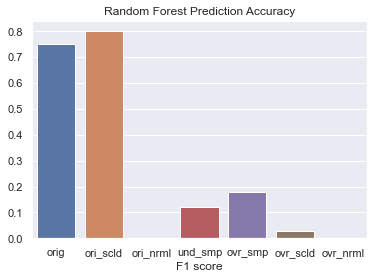

In [ ]:
sns.barplot(dataset,f1_RF)
plt.title('Random Forest Prediction Accuracy')
plt.xlabel('F1 score')

In [ ]:
dataset=['orig','ori_scld','ori_nrml','und_smp','ovr_smp','ovr_scld','ovr_nrml']
f1_NB=[0.7,0.7,0.7,0.7,0.7,0.7,0.7]

Text(0.5, 0, 'F1 score')

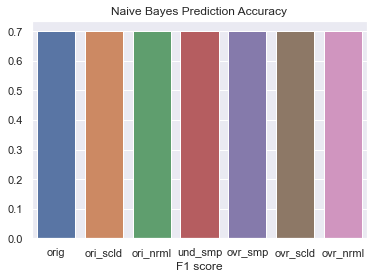

In [ ]:
sns.barplot(dataset,f1_NB)
plt.title('Naive Bayes Prediction Accuracy')
plt.xlabel('F1 score')

In [ ]:
dataset=['orig','ori_scld','ori_nrml','und_smp','ovr_smp','ovr_scld','ovr_nrml']
f1_Logreg=[0.74,0,0,0.09,0.64,0,0]

Text(0.5, 0, 'F1 score')

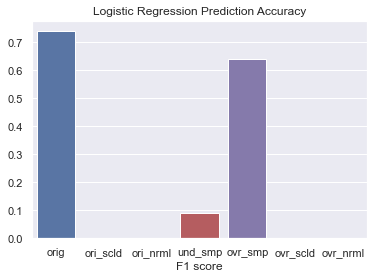

In [ ]:
sns.barplot(dataset,f1_Logreg)
plt.title('Logistic Regression Prediction Accuracy')
plt.xlabel('F1 score')

In [ ]:
dataset=['orig','ori_scld','ori_nrml','und_smp','ovr_smp','ovr_scld','ovr_nrml']
f1_xgb=[0.67,0.67,0.63,0.04,0.5,0.01,0.09]

Text(0.5, 0, 'F1 score')

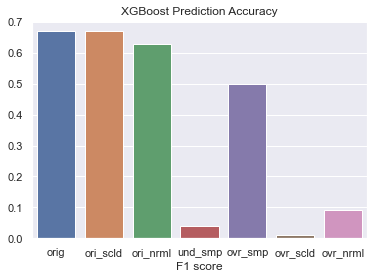

In [ ]:
sns.barplot(dataset,f1_xgb)
plt.title('XGBoost Prediction Accuracy')
plt.xlabel('F1 score')

In [ ]:
model=['NB','Log_reg','XGB','RF']
accuracy=[0.44,0.5,0.73,0.2]

Text(0.5, 0, 'classifier model')

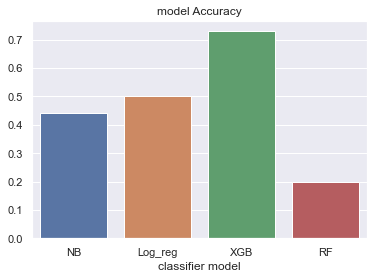

In [ ]:
sns.barplot(model,accuracy)
plt.title('model Accuracy')
plt.xlabel('classifier model')

<h3 style='color:blue;style-size:25px;style-font:verdana'> Summary</h3>

 - <h3>Accuracy depends on dataset transformation,classifier model and metric for fitting </h3>
 - <h3>Dataset is PCA transformed. Hence further scaling or normalization did not improve scores </h3>
 - <h3>Prediction accuracy is poor and overall XGB performed the best </h3>
 - <h3>oversampling or undersampling of the dataset did not improve the classification accuracy </h3>

<a id='ANN'></a>

<h2 style="color:blue;font-size:30px;font-family:verdana"> Classification using ANN Model </h2>

[click here to go to main menu](#main)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
test=pd.read_csv("test_data.csv",header=0,engine="python")
train=pd.read_csv("train_data.csv",header=0,engine="python")
test_hide=pd.read_csv("test_data_hidden.csv",header=0,engine="python")

In [ ]:
train.shape,test.shape,test_hide.shape

((227845, 31), (56962, 30), (56962, 31))

In [ ]:
import imblearn

### Data resampling

In [ ]:
y_model=train.loc[:,"Class"]
X_model=train.drop(["Class"],axis=1)
X_model.shape,y_model.shape

((227845, 30), (227845,))

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=0)
X_over,y_over=smt.fit_resample(X_model,y_model)

In [ ]:
common=pd.merge(X_over,y_over,left_index=True,right_index=True)

In [ ]:
resampled=common.sample(n=5000,random_state=50)

In [ ]:
resampled.to_csv('train_resampled.csv')

In [ ]:
y_ann=resampled.loc[:,"Class"]
X_ann=resampled.drop(["Class"],axis=1)
X_ann.shape,y_ann.shape

((5000, 30), (5000,))

In [ ]:
df_pivot = pd.DataFrame({'types': X_ann.dtypes,
                         'nulls': X_ann.isna().sum(),
                          '% nulls': X_ann.isna().sum() / X_ann.shape[0],
                          'size': X_ann.shape[0],
                          'uniques': X_ann.nunique()})
df_pivot

,types,nulls,% nulls,size,uniques
Time,float64,0,0.0,5000,4924
V1,float64,0,0.0,5000,4954
V2,float64,0,0.0,5000,4954
V3,float64,0,0.0,5000,4954
V4,float64,0,0.0,5000,4954
V5,float64,0,0.0,5000,4954
V6,float64,0,0.0,5000,4954
V7,float64,0,0.0,5000,4954
V8,float64,0,0.0,5000,4954
V9,float64,0,0.0,5000,4954


In [ ]:
from collections import Counter
print(Counter(y_ann))

Counter({1: 2527, 0: 2473})


In [ ]:
test_ann=test_hide.sample(n=5000,random_state=50)

In [ ]:
test_ann.to_csv('test_ann.csv')

In [ ]:
y_test_ann=test_ann.Class
test_ann=test_ann.drop(['Class'],axis=1)
test_ann.shape,y_test_ann.shape

((5000, 30), (5000,))

### for building ANN Model we oversampled the data, created a random sample of size ~2.5% of original data and scaled the data 

In [ ]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_ann)
x_train_normalized = preprocessParams.transform(X_ann)
x_test_normalized = preprocessParams.transform(test_ann)

 ### building ANN

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
x_train_norm=x_train_normalized.reshape(5000,30,1)

In [ ]:
x_test_norm=x_test_normalized.reshape(5000,30,1)

In [ ]:
x_train_norm.shape,x_test_norm.shape

((5000, 30, 1), (5000, 30, 1))

#### Adam optimizer

In [ ]:

fc_size=64
#Initialize model, reshape & normalize data
model_adam = tf.keras.models.Sequential()

#Add first convolutional layer
model_adam.add(tf.keras.layers.Conv1D(32, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu',
                                 input_shape=x_train_norm[0].shape))
#normalize data
model_adam.add(tf.keras.layers.BatchNormalization())
model_adam.add(tf.keras.layers.Dropout(0.2))



#Add MaxPooling layer
#model_elu.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

#Add second convolutional layer
model_adam.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_adam.add(tf.keras.layers.BatchNormalization())
model_adam.add(tf.keras.layers.Dropout(0.5))

#Flatten the output
model_adam.add(tf.keras.layers.Flatten())

#Dense layer
model_adam.add(tf.keras.layers.Dense(fc_size, activation='relu'))

#Add another dropout layer
model_adam.add(tf.keras.layers.Dropout(0.4))

#Output layer
model_adam.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_adam.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_adam.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [ ]:
X_ann.shape,y_ann.shape,test_ann.shape,y_test_ann.shape

((5000, 30), (5000,), (5000, 30), (5000,))

In [ ]:
X_ann=X_ann.to_numpy()
y_ann=y_ann.to_numpy()
test_ann=test_ann.to_numpy()
y_test_ann=y_test_ann.to_numpy()

In [ ]:
x_train=X_ann.reshape(5000,30,1)
y_train=y_ann.reshape(5000,1)
x_test=test_ann.reshape(5000,30,1)
y_test=y_test_ann.reshape(5000,1)

In [ ]:
ACCURACY_THRESHOLD=0.99
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True
        return logs
# Instantiate a callback object
callbacks = myCallback()

Epoch 1/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0997 - accuracy: 0.9654 - val_loss: 0.0667 - val_accuracy: 0.9964
Epoch 2/100
100/100 [==============================] - 1s 12ms/step - loss: 0.0878 - accuracy: 0.9684 - val_loss: 0.1039 - val_accuracy: 0.9792
Epoch 3/100
100/100 [==============================] - 1s 12ms/step - loss: 0.0794 - accuracy: 0.9726 - val_loss: 0.0582 - val_accuracy: 0.9936
Epoch 4/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0744 - accuracy: 0.9712 - val_loss: 0.0848 - val_accuracy: 0.9776
Epoch 5/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0732 - accuracy: 0.9728 - val_loss: 0.0870 - val_accuracy: 0.9768
Epoch 6/100
100/100 [==============================] - 1s 12ms/step - loss: 0.0640 - accuracy: 0.9780 - val_loss: 0.0556 - val_accuracy: 0.9838
Epoch 7/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0604 - accuracy: 0.9786 - val_loss: 0.0450 - val_accuracy:

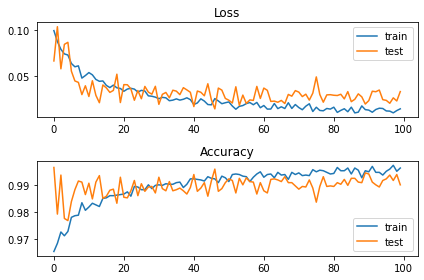

In [ ]:
# fit model
from sklearn.metrics import confusion_matrix
history = model_adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1,batch_size=50)
# evaluate the model
print("adam binary_crossentropy 100 epochs")
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# fit model
from sklearn.metrics import confusion_matrix
history = model_adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1,batch_size=50,callbacks=[callbacks])


Epoch 1/100
100/100 [==============================] - 1s 15ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0382 - val_accuracy: 0.9876
Epoch 2/100
100/100 [==============================] - 1s 14ms/step - loss: 0.0113 - accuracy: 0.9954 - val_loss: 0.0390 - val_accuracy: 0.9884
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9956
Reached 99.00% accuracy, so stopping training!!
100/100 [==============================] - 1s 13ms/step - loss: 0.0102 - accuracy: 0.9956 - val_loss: 0.0243 - val_accuracy: 0.9922


In [ ]:
history.history

{'loss': [0.014042196795344353, 0.011271228082478046, 0.010213417932391167],
 'accuracy': [0.9955999851226807, 0.9954000115394592, 0.9955999851226807],
 'val_loss': [0.03815317153930664, 0.03901704400777817, 0.024315187707543373],
 'val_accuracy': [0.9876000285148621, 0.9883999824523926, 0.9922000169754028]}

In [ ]:
# getting classification from probabilites
def actual_ypred(x_test):
    act_ypred=[]
    y_pred=model_adam.predict(x_test)
    for val in y_pred:
        if val[0]<0.9:
            val[0]=0
            act_ypred.append(val[0])
        else:
            val[0]=1
            act_ypred.append(val[0])
    return act_ypred       
ypred=actual_ypred(x_test)    
len(ypred)

5000

list

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print("Classification report for adam model %s:\n%s\n"
      % (model_adam.predict, classification_report(y_test, ypred)))

Classification report for adam model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002134EC7E088>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.41      1.00      0.58         9

    accuracy                           1.00      5000
   macro avg       0.70      1.00      0.79      5000
weighted avg       1.00      1.00      1.00      5000




#### build confusion matrix adam model

In [ ]:
y_test_list=[]
for val in y_test:
    y_test_list.append(val[0])
print(len(y_test_list))    

5000


In [ ]:
data_adam={'true':y_test_list,'predicted':ypred}
adam_matrix=pd.DataFrame(data_adam,columns=['true','predicted'])
adam_conf_matrx=pd.crosstab(adam_matrix['true'],adam_matrix['predicted'],rownames=["Actual"],colnames=["Predicted"])

### Adam Classification Report and Confusion Matrix

In [ ]:
print(adam_conf_matrx)

Predicted   0.0  1.0
Actual              
0          4978   13
1             0    9


<h2 style="color:orange;style-size:30px;style-font:verdana">Classification Report using ANN Model using ADAM Optimizer</h2>

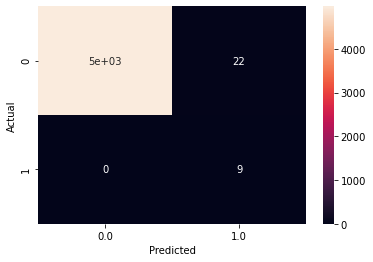

In [ ]:
sns.heatmap(relu_conf_matrx,annot=True)

#### SGD optimizer

In [ ]:

fc_size=64
#Initialize model, reshape & normalize data
model_sgd = tf.keras.models.Sequential()

#Add first convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(32, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu',
                                 input_shape=x_train_norm[0].shape))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())
model_sgd.add(tf.keras.layers.Dropout(0.2))



#Add MaxPooling layer
model_sgd.add(tf.keras.layers.MaxPool1D(pool_size=(2),strides=2,padding='valid'))

#Add second convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())
model_sgd.add(tf.keras.layers.Dropout(0.5))

#Flatten the output
model_sgd.add(tf.keras.layers.Flatten())

#Dense layer
model_sgd.add(tf.keras.layers.Dense(fc_size, activation='relu'))

#Add another dropout layer
model_sgd.add(tf.keras.layers.Dropout(0.4))

#Output layer
model_sgd.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_sgd.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_sgd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 64)           

Epoch 1/100
100/100 [==============================] - 3s 31ms/step - loss: 0.3154 - accuracy: 0.8714 - val_loss: 0.2554 - val_accuracy: 0.9938
Epoch 2/100
100/100 [==============================] - 1s 9ms/step - loss: 0.1947 - accuracy: 0.9270 - val_loss: 0.0935 - val_accuracy: 0.9962
Epoch 3/100
100/100 [==============================] - 1s 10ms/step - loss: 0.1728 - accuracy: 0.9396 - val_loss: 0.0472 - val_accuracy: 0.9970
Epoch 4/100
100/100 [==============================] - 1s 11ms/step - loss: 0.1479 - accuracy: 0.9500 - val_loss: 0.0433 - val_accuracy: 0.9942
Epoch 5/100
100/100 [==============================] - 1s 9ms/step - loss: 0.1477 - accuracy: 0.9422 - val_loss: 0.0385 - val_accuracy: 0.9928
Epoch 6/100
100/100 [==============================] - 1s 9ms/step - loss: 0.1438 - accuracy: 0.9482 - val_loss: 0.0485 - val_accuracy: 0.9886
Epoch 7/100
100/100 [==============================] - 1s 9ms/step - loss: 0.1474 - accuracy: 0.9466 - val_loss: 0.0455 - val_accuracy: 0.9

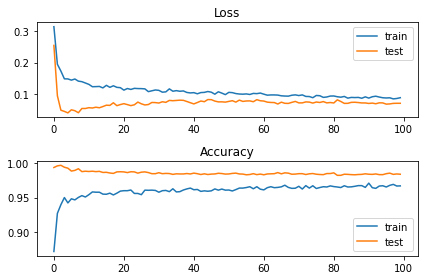

In [ ]:
# fit model

history = model_sgd.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1,batch_size=50)
# evaluate the model
print("SGD binary_crossentropy 100 epochs elu")
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
history = model_sgd.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1,batch_size=50,callbacks=[callbacks])

Epoch 1/100
100/100 [==============================] - 2s 23ms/step - loss: 0.0948 - accuracy: 0.9660 - val_loss: 0.0702 - val_accuracy: 0.9844
Epoch 2/100
100/100 [==============================] - 2s 17ms/step - loss: 0.0905 - accuracy: 0.9666 - val_loss: 0.0711 - val_accuracy: 0.9852
Epoch 3/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0852 - accuracy: 0.9678 - val_loss: 0.0674 - val_accuracy: 0.9858
Epoch 4/100
100/100 [==============================] - 1s 10ms/step - loss: 0.0827 - accuracy: 0.9686 - val_loss: 0.0667 - val_accuracy: 0.9860
Epoch 5/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0838 - accuracy: 0.9678 - val_loss: 0.0698 - val_accuracy: 0.9840
Epoch 6/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0838 - accuracy: 0.9682 - val_loss: 0.0692 - val_accuracy: 0.9834
Epoch 7/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0801 - accuracy: 0.9706 - val_loss: 0.0647 - val_accuracy: 0.9

In [ ]:
def actual_ypred(x_test):
    act_ypred=[]
    y_pred=model_sgd.predict(x_test)
    for val in y_pred:
        if val[0]<0.9:
            val[0]=0
            act_ypred.append(val[0])
        else:
            val[0]=1
            act_ypred.append(val[0])
    return act_ypred       
ypred_sgd=actual_ypred(x_test)    
len(ypred_sgd)

5000

In [ ]:
print("Classification report for SGD model %s:\n%s\n"
      % (model_sgd.predict, classification_report(y_test, ypred_sgd)))

Classification report for SGD model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002135BDF4388>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.67      0.89      0.76         9

    accuracy                           1.00      5000
   macro avg       0.83      0.94      0.88      5000
weighted avg       1.00      1.00      1.00      5000




#### SGD classification report and confusion matrix 

In [ ]:
data_sgd={'true':y_test_list,'predicted':ypred_sgd}
sgd_matrix=pd.DataFrame(data_sgd,columns=['true','predicted'])
sgd_conf_matrx=pd.crosstab(sgd_matrix['true'],sgd_matrix['predicted'],rownames=["Actual"],colnames=["Predicted"])
print(sgd_conf_matrx)

Predicted   0.0  1.0
Actual              
0          4987    4
1             1    8


<h2 style="color:orange;style-size:30px;style-font:verdana">Classification Report using ANN Model using SGD Optimizer</h2>

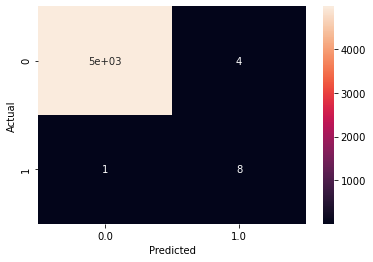

In [ ]:
sns.heatmap(sgd_conf_matrx,annot=True)

### grid search optimization

In [ ]:
    def create_model(optimizer=False,activation=False,dropout=False):       
            # build model
            fc_size=64
            #Initialize model, reshape & normalize data
            model = tf.keras.models.Sequential()

            #Add first convolutional layer
            model.add(tf.keras.layers.Conv1D(32, #Number of filters 
                                             kernel_size=2, #Size of the filter
                                             activation= activation,
                                             input_shape=x_train_norm[0].shape))
            #normalize data
            model.add(tf.keras.layers.BatchNormalization())
            model.add(tf.keras.layers.Dropout(dropout))



            #Add MaxPooling layer
            model.add(tf.keras.layers.MaxPool1D(pool_size=(2),strides=2,padding='valid'))

            #Add second convolutional layer
            model.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                             kernel_size=2, #Size of the filter
                                             activation=activation))
            #normalize data
            model.add(tf.keras.layers.BatchNormalization())
            model.add(tf.keras.layers.Dropout(dropout))

            #Flatten the output
            model.add(tf.keras.layers.Flatten())

            #Dense layer
            model.add(tf.keras.layers.Dense(fc_size, activation=activation))

            #Add another dropout layer
            model.add(tf.keras.layers.Dropout(dropout))

            #Output layer
            model.add(tf.keras.layers.Dense(1, activation=activation))
            
            # compile model
            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
            
            return model
        

In [ ]:
from sklearn.model_selection import GridSearchCV
from  tensorflow.keras.wrappers.scikit_learn import KerasClassifier as kC

In [ ]:
model_cv=kC(build_fn=create_model,epochs=10,batch_size=10,verbose=1)

In [ ]:
epochs=[25,100]
batchsize=[10,50,1000]
activation=['relu','softmax']
optimizer=['adam','SGD','RMSprop']
dropout=[0.1,0.4]
param_grid={'epochs':epochs,'batch_size':batchsize,'optimizer':optimizer,'dropout':dropout,'activation':activation}
grid=GridSearchCV(estimator=model_cv,param_grid=param_grid,n_jobs=1,cv=4)
grid_result=grid.fit(x_train,y_train)

Epoch 1/25
375/375 [==============================] - 2s 4ms/step - loss: 1.0095 - accuracy: 0.9235
Epoch 2/25
375/375 [==============================] - 2s 4ms/step - loss: 0.9691 - accuracy: 0.9315
Epoch 3/25
375/375 [==============================] - 1s 4ms/step - loss: 0.9885 - accuracy: 0.9331
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.8205 - accuracy: 0.9421
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.9491
Epoch 6/25
375/375 [==============================] - 1s 4ms/step - loss: 0.8068 - accuracy: 0.9443
Epoch 7/25
375/375 [==============================] - 2s 5ms/step - loss: 1.0922 - accuracy: 0.9235
Epoch 8/25
375/375 [==============================] - 1s 4ms/step - loss: 0.7493 - accuracy: 0.9504
Epoch 9/25
375/375 [==============================] - 1s 4ms/step - loss: 0.6431 - accuracy: 0.9568
Epoch 10/25
375/375 [==============================] - 1s 3ms/step - loss: 0.7360 - accuracy: 0.9507

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### ANN Model using SGD optimizer showed better precision in classifying the data. Cross validation was computationally intensive.

<a id='anamoly'></a>

<h2 style="color:blue;font-size:30px;font-style:verdana"> Anamoly Detection</h2>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.shape, test.shape

((5000, 32), (5000, 32))

In [ ]:
train.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

In [ ]:
X_train=train.iloc[:,1:31]
X_test=test.iloc[:,1:31]
X_train.shape,X_test.shape

((5000, 30), (5000, 30))

In [ ]:
y_train=train["Class"]
y_test=test["Class"]

In [ ]:
y_train.shape,y_test.shape

((5000,), (5000,))

In [ ]:
X_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### the features of the dataset have significant differences from gaussian distribution

In [ ]:
from scipy import stats

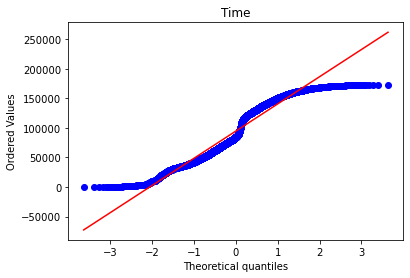

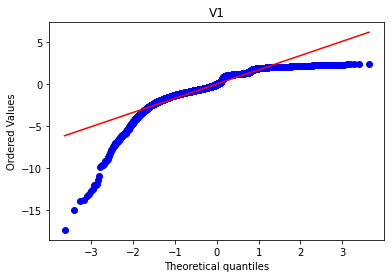

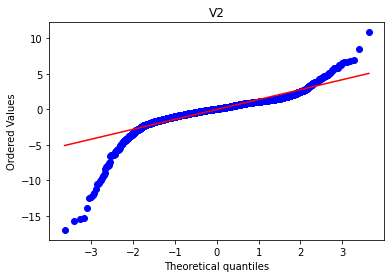

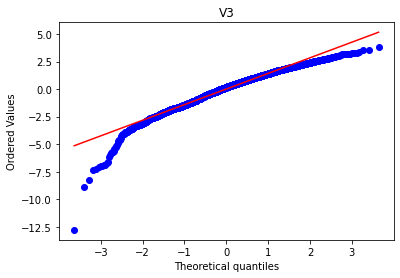

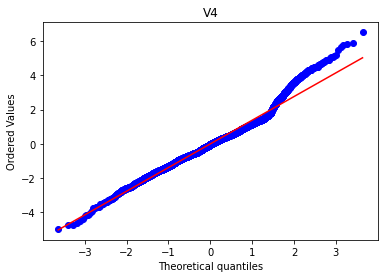

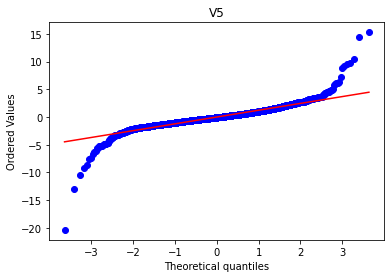

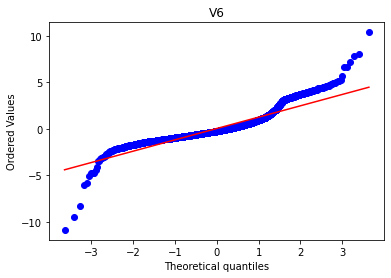

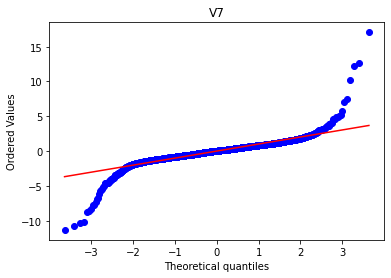

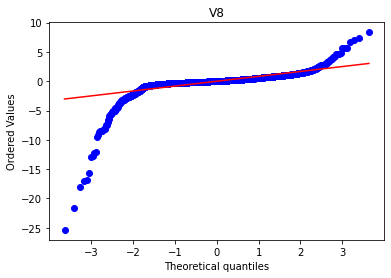

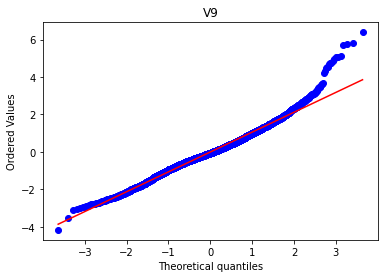

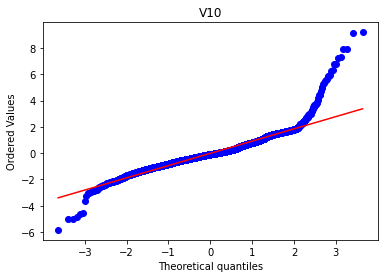

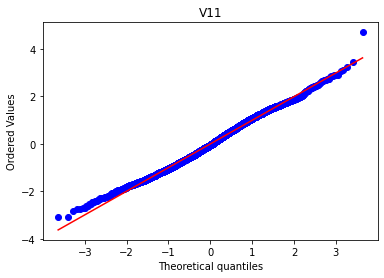

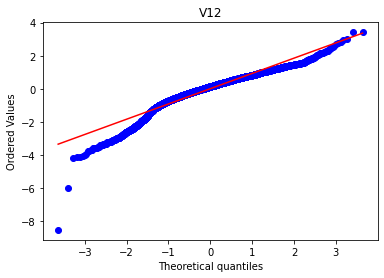

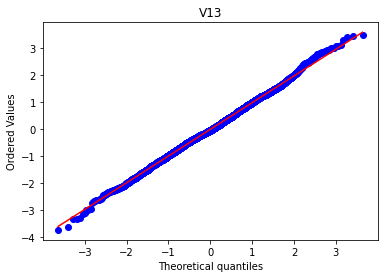

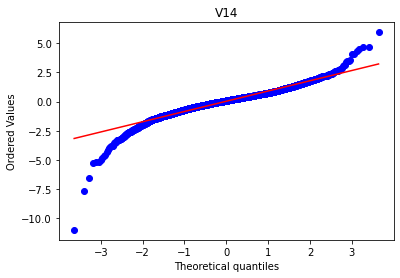

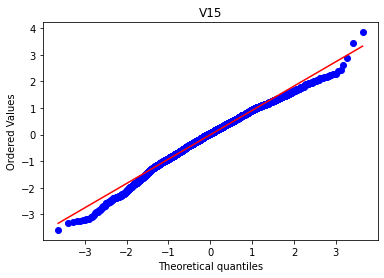

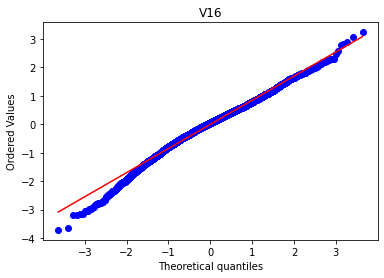

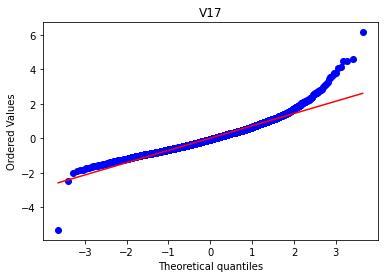

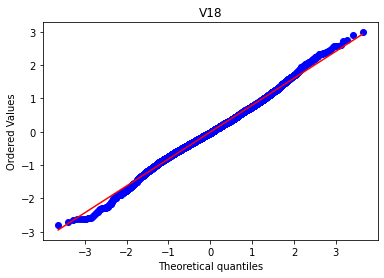

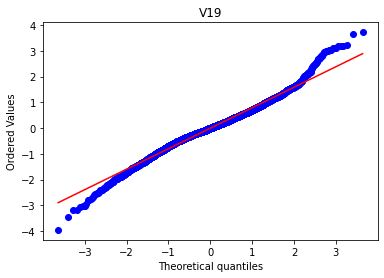

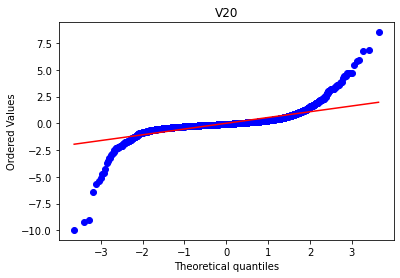

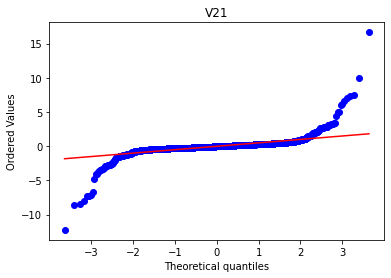

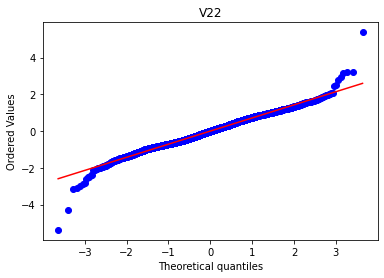

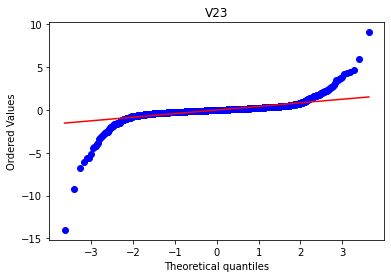

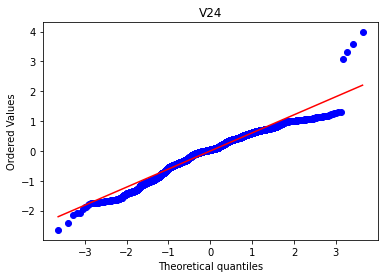

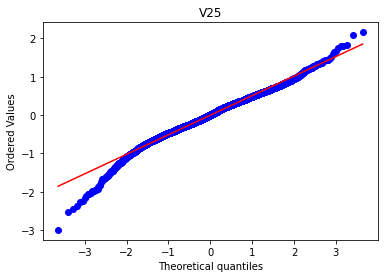

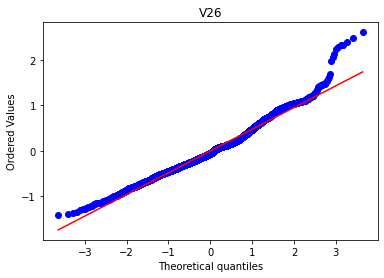

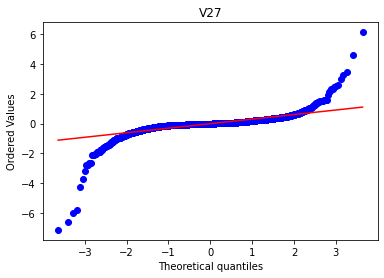

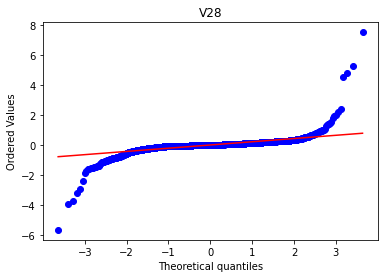

In [ ]:
for n in range(29):
    stats.probplot(x_train.iloc[:,n],dist="norm",plot=plt)
    plt.title(x_train.columns[n])
    plt.show()    

In [ ]:
x_train=X_train.to_numpy()
y_train=y_train.to_numpy()
x_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
x_train.shape

(5000, 30)

In [ ]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [ ]:
from collections import Counter
print(Counter(y_train))

Counter({0: 4994, 1: 6})


In [ ]:
#Importing IsolationForest module
from sklearn.ensemble import IsolationForest

#Importing Line2D for marking legend in graph
from matplotlib.lines import Line2D

#Just to filter out warnings- Well I hate warnings popping on the screen 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
clf=IsolationForest(random_state=0,contamination=6/4994)

In [ ]:
clf.fit(x_train)

IsolationForest(contamination=0.0012014417300760913, random_state=0)

In [ ]:
y_outlier_train=clf.predict(x_train)

In [ ]:
y_outlier_test=clf.predict(x_test)

In [ ]:
np.count_nonzero(y_outlier_train[y_outlier_train==1])

4993

In [ ]:
np.count_nonzero(y_outlier_train[y_outlier_train==-1])

7

In [ ]:
x_train=pd.DataFrame(x_train)


(5000, 30)

In [ ]:
genuine=np.count_nonzero(y_outlier_train[y_outlier_train==1])

In [ ]:
fraud=np.count_nonzero(y_outlier_train[y_outlier_train==-1])

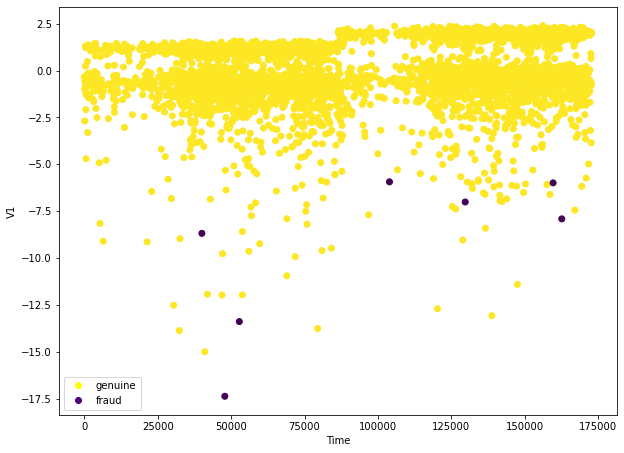

In [ ]:
#Now we will plot and visualize how good our algorithm works for training data
#y_train(the state) will mark the colors accordingly
plt.figure(figsize=(10,7.5))
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_outlier_train)
plt.xlabel('Time')
plt.ylabel('V1')
 
#This is to set the legend appropriately
legend_elements = [Line2D([X_train.iloc[:,0]], [genuine], marker='o', color='yellow', label='genuine',linestyle='None'),
                    Line2D([X_train.iloc[:,0]], [fraud], marker='o', color='indigo', label='fraud', linestyle='None')]
plt.legend(handles=legend_elements)

In [ ]:
a=clf.decision_function(x_train)

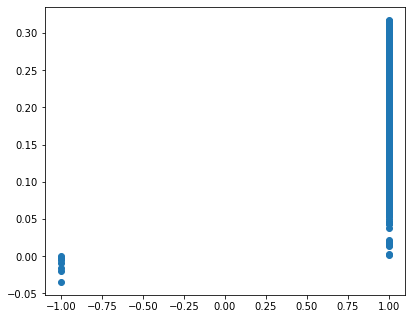

In [ ]:
fig=plt.figure(figsize=(5,4))
axs=fig.add_axes([0,0,1,1])
axs.scatter(y_outlier_train,a)

In [ ]:
a

array([0.26245842, 0.25559639, 0.2521156 , ..., 0.24357116, 0.23605097,
       0.2717334 ])

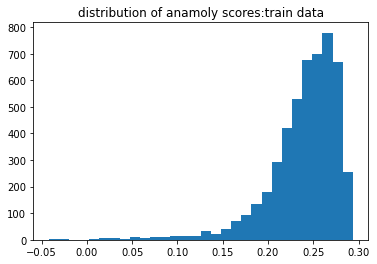

In [ ]:
plt.hist(a,bins=30)
plt.title('distribution of anamoly scores:train data')
plt.show()

In [ ]:
b=clf.decision_function(x_test)

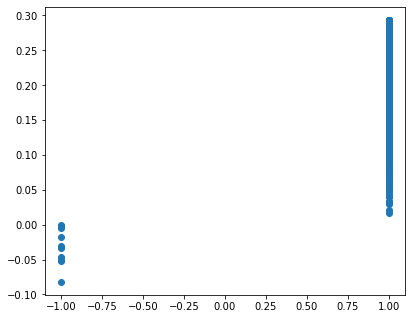

In [ ]:
fig=plt.figure(figsize=(5,4))
axs=fig.add_axes([0,0,1,1])
axs.scatter(y_outlier_test,b)

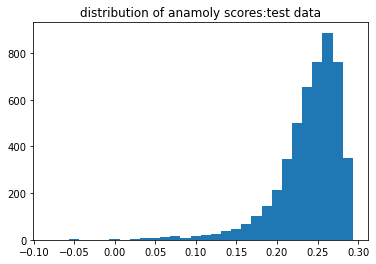

In [ ]:
plt.hist(b,bins=30)
plt.title('distribution of anamoly scores:test data')
plt.show()

In [ ]:
aa=pd.DataFrame(a)
revised_xtrain=X_train.merge(aa,on=X_train.index)
revised_xtrain.head()

,key_0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,0
0,0,170725.0,0.094618,0.903707,-0.005935,-0.768838,0.845070,-0.672071,1.061046,-0.209057,...,-0.298949,-0.639246,-0.029312,-0.699275,-0.358904,0.181972,0.251192,0.091784,4.99,0.281534
1,1,170024.0,0.070893,0.935948,-0.975433,-0.691433,1.592652,-0.432971,1.447298,-0.432400,...,-0.044828,0.074564,-0.202987,0.234837,-0.021612,0.410629,-0.466000,-0.240596,18.92,0.277300
2,2,137652.0,-0.185427,0.554910,1.341153,-0.433916,-0.054219,-0.067291,0.197045,0.078923,...,0.208159,0.696237,-0.363485,-0.632507,-0.139199,0.328146,0.144911,0.133210,6.27,0.276312
3,3,128052.0,-0.605222,0.533385,-1.095582,-2.154334,-0.038452,-0.175218,0.225034,0.339564,...,0.040162,0.095532,0.083139,0.071780,-0.026877,-0.356425,0.003762,0.014669,60.00,0.291855
4,4,45460.0,-0.925654,-0.125770,2.315891,-0.228360,-0.389407,1.041508,2.206091,-2.043776,...,-0.718135,-0.037870,-0.384860,-0.451514,-0.540682,-0.642102,-1.903684,-1.151822,226.18,0.140990


In [ ]:
revised_xtrain.rename(columns={0:'anamoly'},inplace=True)
revised_xtrain.drop('key_0',axis=1,inplace=True)
revised_xtrain.head(n=2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,anamoly
0,170725.0,0.094618,0.903707,-0.005935,-0.768838,0.845070,-0.672071,1.061046,-0.209057,-0.124319,...,-0.298949,-0.639246,-0.029312,-0.699275,-0.358904,0.181972,0.251192,0.091784,4.99,0.281534
1,170024.0,0.070893,0.935948,-0.975433,-0.691433,1.592652,-0.432971,1.447298,-0.432400,-0.299742,...,-0.044828,0.074564,-0.202987,0.234837,-0.021612,0.410629,-0.466000,-0.240596,18.92,0.277300


In [ ]:
bb=pd.DataFrame(b)
revised_xtest=X_test.merge(bb,on=X_test.index)
revised_xtest.head(n=2)

,key_0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,0
0,0,66612.0,1.237285,0.278850,0.184776,0.502354,-0.175093,-0.566471,-0.040474,-0.021666,...,-0.260606,-0.797694,0.079698,-0.043655,0.221706,0.098186,-0.028827,0.016704,1.29,0.308925
1,1,92001.0,-0.907708,0.550707,0.941650,-0.557699,-0.182350,-0.171251,-0.229757,0.517540,...,0.125165,0.574658,-0.169894,-0.673081,-0.287898,0.711104,0.202796,0.112516,39.87,0.254172


In [ ]:
revised_xtest.rename(columns={0:'anamoly'},inplace=True)
revised_xtest.drop('key_0',axis=1,inplace=True)

In [ ]:
revised_xtest.head(n=2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,anamoly
0,66612.0,1.237285,0.278850,0.184776,0.502354,-0.175093,-0.566471,-0.040474,-0.021666,-0.167582,...,-0.260606,-0.797694,0.079698,-0.043655,0.221706,0.098186,-0.028827,0.016704,1.29,0.308925
1,92001.0,-0.907708,0.550707,0.941650,-0.557699,-0.182350,-0.171251,-0.229757,0.517540,1.826061,...,0.125165,0.574658,-0.169894,-0.673081,-0.287898,0.711104,0.202796,0.112516,39.87,0.254172


In [ ]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
ann_train=revised_xtrain.merge(y_train,on=X_train.index)
ann_test=revised_xtest.merge(y_test,on=X_test.index)

In [ ]:
ann_train.head(n=2)

,key_0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,anamoly,0
0,0,170725.0,0.094618,0.903707,-0.005935,-0.768838,0.845070,-0.672071,1.061046,-0.209057,...,-0.639246,-0.029312,-0.699275,-0.358904,0.181972,0.251192,0.091784,4.99,0.281534,0
1,1,170024.0,0.070893,0.935948,-0.975433,-0.691433,1.592652,-0.432971,1.447298,-0.432400,...,0.074564,-0.202987,0.234837,-0.021612,0.410629,-0.466000,-0.240596,18.92,0.277300,0


In [ ]:
ann_train.drop(['key_0'],axis=1,inplace=True)
ann_train.rename(columns={0:'Class'},inplace=True)
ann_train.head(n=2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,anamoly,Class
0,170725.0,0.094618,0.903707,-0.005935,-0.768838,0.845070,-0.672071,1.061046,-0.209057,-0.124319,...,-0.639246,-0.029312,-0.699275,-0.358904,0.181972,0.251192,0.091784,4.99,0.281534,0
1,170024.0,0.070893,0.935948,-0.975433,-0.691433,1.592652,-0.432971,1.447298,-0.432400,-0.299742,...,0.074564,-0.202987,0.234837,-0.021612,0.410629,-0.466000,-0.240596,18.92,0.277300,0


In [ ]:
ann_test.drop(['key_0'],axis=1,inplace=True)
ann_test.rename(columns={0:'Class'},inplace=True)
ann_test.head(n=2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,anamoly,Class
0,66612.0,1.237285,0.278850,0.184776,0.502354,-0.175093,-0.566471,-0.040474,-0.021666,-0.167582,...,-0.797694,0.079698,-0.043655,0.221706,0.098186,-0.028827,0.016704,1.29,0.308925,0
1,92001.0,-0.907708,0.550707,0.941650,-0.557699,-0.182350,-0.171251,-0.229757,0.517540,1.826061,...,0.574658,-0.169894,-0.673081,-0.287898,0.711104,0.202796,0.112516,39.87,0.254172,0


In [ ]:
ann_train.to_csv('anamoly_train.csv',index=False)
ann_test.to_csv('anamoly_test.csv',index=False)

<h2 style="color:blue;font-size:20px;font-family:verdana"> Summary </h2>

 - <h3>Isolation Forest algorithm successfully classified the fraud transactions as outliers</h3>
 - <h3>the dataset has significant deviations from a Gaussian distribution</h3>
 - <h3>a data point with IF score above 0 is within the population and a data point with IF score below 0 is an outlier </h3>
 - <h3>Thus this IF score=0 can be used as a threshold score to classify a fraud transaction </h3>    

<h2 style="color:orange;font-style:verdana;font-size:30px">Classification by ML models with anamoly threshold score as feature</h2>

In [ ]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
sns.set(color_codes=True)
import functools
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score , precision_score, recall_score
from datetime import datetime

In [ ]:
train=pd.read_csv("anamoly_train.csv",header=0,engine="python")
test=pd.read_csv("anamoly_test.csv",header=0,engine="python")

In [ ]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'anamoly', 'Class'],
      dtype='object')

In [ ]:
import imblearn

In [ ]:
y_train=train.loc[:,"Class"]
X_train=train.drop(["Class"],axis=1)
X_train.shape,y_train.shape

((5000, 31), (5000,))

In [ ]:
X_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'anamoly'],
      dtype='object')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler(random_state=0)
X_under,y_under=rs.fit_resample(X_train,y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=0)
X_ov_smp,y_ov_smp=smt.fit_resample(X_train,y_train)

In [ ]:
X_ov_smp=pd.DataFrame(X_ov_smp)
X_ov_smp.columns=X_train.columns

In [ ]:
from collections import Counter
print(f'training class 0: {Counter(y_train)[0]} 1: {Counter(y_train)[1]}, ',f'oversampled class 0: {Counter(y_ov_smp)[0]} 1: {Counter(y_ov_smp)[1]}, ',f'undersampled class 0: {Counter(y_under)[0]} 1: {Counter(y_under)[1]}')

training class 0: 4994 1: 6,  oversampled class 0: 4994 1: 4994,  undersampled class 0: 6 1: 6


In [ ]:
y_test=test.loc[:,'Class']
test.drop('Class',axis=1,inplace=True)

In [ ]:
test.shape,y_test.shape

((5000, 31), (5000,))

In [ ]:
X_ov_smp.shape,y_ov_smp.shape

((9988, 31), (9988,))

In [ ]:
X_under.shape,y_under.shape

((12, 31), (12,))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
scaler=StandardScaler()
scaled_under=scaler.fit_transform(X_under)
scaled_over=scaler.fit_transform(X_ov_smp)
scaled_train=scaler.fit_transform(X_train)

In [ ]:
scaled_under=pd.DataFrame(scaled_under)
scaled_over=pd.DataFrame(scaled_over)
scaled_train=pd.DataFrame(scaled_train)

In [ ]:
scaled_under.columns=X_train.columns
scaled_over.columns=X_train.columns
scaled_train.columns=X_train.columns

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
nx_train=normalize(X_train)
nx_train=pd.DataFrame(nx_train)
nx_train.columns=X_train.columns
nx_train.shape

(5000, 31)

In [ ]:
### Oversamoled normalized data

In [ ]:
nov_xtrain=normalize(X_ov_smp)
nov_xtrain=pd.DataFrame(nov_xtrain)
nov_xtrain.columns=X_train.columns
nov_xtrain.shape

(9988, 31)

In [ ]:
# timer function
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
data=[(X_train,y_train,'original'),(nx_train,y_train,'original normalized'),(scaled_train,y_train,'original scaled'),(X_under,y_under,'undersampled'),(X_ov_smp,y_ov_smp,'oversampled'),(scaled_over,y_ov_smp,'oversampled scaled'),(nov_xtrain,y_ov_smp,'oversampled normalized')]

In [ ]:
for item in data:
    print(item[2])
    print(item[0].shape)
    print(item[1].shape)

original
(5000, 31)
(5000,)
original normalized
(5000, 31)
(5000,)
original scaled
(5000, 31)
(5000,)
undersampled
(12, 31)
(12,)
oversampled
(9988, 31)
(9988,)
oversampled scaled
(9988, 31)
(9988,)
oversampled normalized
(9988, 31)
(9988,)


### Gaussian Naive Bayes Model

In [ ]:
param = [{'var_smoothing':[1e-11,1e-10,1e-9]}]
scores=['roc_auc','f1','precision','recall']
NB_clf=GaussianNB()

In [ ]:
start_time=timer(None)

for entry in data:
  print("GaussianNB model")
  print(entry[2])
  X=entry[0]
  y=entry[1]
  print(X_train.shape)
  print(y_train.shape)
  for score in scores:    
      model=GridSearchCV(NB_clf,param_grid=param,cv=5,scoring=score)
      model.fit(X_train,y_train)
      print(score)    
      print()
      print(model.best_params_)
      print(model.best_score_)
      y_true, y_pred = y_test, model.predict(test)
      
      print(classification_report(y_true, y_pred))
           
timer(start_time)    

GaussianNB model
original
(5000, 31)
(5000,)
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

    accuracy                           1.00      5000
   macro avg       0.65      1.00      0.73      5000
weighted avg       1.00      1.00      1.00      5000

f1

{'var_smoothing': 1e-09}
0.4444444444444445
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000



C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'var_smoothing': 1e-09}
0.425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'var_smoothing': 1e-11}
0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000

GaussianNB model
original normalized
(5000, 31)
(5000,)
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46      

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'var_smoothing': 1e-09}
0.425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'var_smoothing': 1e-11}
0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000

GaussianNB model
original scaled
(5000, 31)
(5000,)
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'var_smoothing': 1e-09}
0.425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'var_smoothing': 1e-11}
0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000

GaussianNB model
undersampled
(5000, 31)
(5000,)
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

 

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'var_smoothing': 1e-09}
0.425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'var_smoothing': 1e-11}
0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000

GaussianNB model
oversampled
(5000, 31)
(5000,)
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46         9

  

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'var_smoothing': 1e-09}
0.425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'var_smoothing': 1e-11}
0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000

GaussianNB model
oversampled scaled
(5000, 31)
(5000,)
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46       

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'var_smoothing': 1e-09}
0.425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'var_smoothing': 1e-11}
0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000

GaussianNB model
oversampled normalized
(5000, 31)
(5000,)
roc_auc

{'var_smoothing': 1e-10}
0.9947945941933918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.30      1.00      0.46   

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'var_smoothing': 1e-09}
0.425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.64      0.78      0.70         9

    accuracy                           1.00      5000
   macro avg       0.82      0.89      0.85      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'var_smoothing': 1e-11}
0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.25      0.89      0.39         9

    accuracy                           0.99      5000
   macro avg       0.62      0.94      0.69      5000
weighted avg       1.00      0.99      1.00      5000


 Time taken: 0 hours 0 minutes and 15.78 seconds.


In [ ]:
### Logistic Regression Model

In [ ]:
param = {'penalty':['l1','l2'], 'C':[1.0,2.0,10.0], 'max_iter':[100,1000]}
scores=['roc_auc','f1','recall']
logreg_clf=LogisticRegression(solver='liblinear')

In [ ]:
start_time=timer(None)
for entry in data:
  print("Logistic Regression")
  print(entry[2])
  X=entry[0]
  y=entry[1]
  print(X.shape)
  print(y.shape)
  for score in scores:    
      model=GridSearchCV(logreg_clf,param_grid=param,cv=5,scoring=score)
      model.fit(X,y)
      print(score)    
      print()
      print(model.best_params_)
      print(model.best_score_)
      y_true, y_pred = y_test, model.predict(test)
      
      print(classification_report(y_true, y_pred))
      
timer(start_time)    

Logistic Regression
original
(5000, 31)
(5000,)
roc_auc

{'C': 1.0, 'max_iter': 1000, 'penalty': 'l1'}
0.9943941937929914
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.75      0.67      0.71         9

    accuracy                           1.00      5000
   macro avg       0.87      0.83      0.85      5000
weighted avg       1.00      1.00      1.00      5000

f1

{'C': 2.0, 'max_iter': 100, 'penalty': 'l1'}
0.5333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.70      0.78      0.74         9

    accuracy                           1.00      5000
   macro avg       0.85      0.89      0.87      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'C': 2.0, 'max_iter': 100, 'penalty': 'l1'}
0.6
              precision    recall  f1-score   support

           0       1.00      1.00      1.00 

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000



C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000

Logistic Regression
original scaled
(5000, 31)
(5000,)


C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


roc_auc

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1'}
0.9961961961961961
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      4991
           1       0.01      1.00      0.01         9

    accuracy                           0.68      5000
   macro avg       0.50      0.84      0.41      5000
weighted avg       1.00      0.68      0.81      5000

f1

{'C': 10.0, 'max_iter': 100, 'penalty': 'l1'}
0.48
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      4991
           1       0.00      1.00      0.01         9

    accuracy                           0.53      5000
   macro avg       0.50      0.77      0.35      5000
weighted avg       1.00      0.53      0.69      5000

recall

{'C': 10.0, 'max_iter': 100, 'penalty': 'l1'}
0.6
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      4991
           1       0.00      1.00      0.01        

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblin

roc_auc

{'C': 10.0, 'max_iter': 1000, 'penalty': 'l1'}
0.7147698995783553
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4991
           1       0.00      1.00      0.00         9

    accuracy                           0.00      5000
   macro avg       0.00      0.50      0.00      5000
weighted avg       0.00      0.00      0.00      5000



C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblin

f1

{'C': 10.0, 'max_iter': 1000, 'penalty': 'l1'}
0.6874260403292919
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4991
           1       0.00      1.00      0.00         9

    accuracy                           0.00      5000
   macro avg       0.00      0.50      0.00      5000
weighted avg       0.00      0.00      0.00      5000



C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


recall

{'C': 10.0, 'max_iter': 1000, 'penalty': 'l1'}
0.7803651346737519
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4991
           1       0.00      1.00      0.00         9

    accuracy                           0.00      5000
   macro avg       0.00      0.50      0.00      5000
weighted avg       0.00      0.00      0.00      5000


 Time taken: 0 hours 22 minutes and 16.12 seconds.


C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
### XGB Classifier Model

In [ ]:
param = {'max_depth':[1,2,3,6], 'learning_rate':[0.005,0.1,2.0], 'gamma':[0,1,50,1000],'n_estimators':[50,100,300]}
scores=['roc_auc','f1','precision','recall']
xgb_clf=XGBClassifier(objective='binary:logistic')

In [ ]:
start_time=timer(None)
for entry in data:
  print("XGB Classifier")
  print(entry[2])
  X=entry[0]
  y=entry[1]
  print(X.shape)
  print(y.shape)
  for score in scores:    
      model=GridSearchCV(xgb_clf,param_grid=param,cv=5,scoring=score)
      model.fit(X,y)
      print(score)    
      print()
      print(model.best_params_)
      print(model.best_score_)
      y_true, y_pred = y_test, model.predict(test)
      
      print(classification_report(y_true, y_pred))
      
timer(start_time)    

XGB Classifier
original
(5000, 31)
(5000,)
roc_auc

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
0.9977977977977979
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.75      0.67      0.71         9

    accuracy                           1.00      5000
   macro avg       0.87      0.83      0.85      5000
weighted avg       1.00      1.00      1.00      5000

f1

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.7333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.67      0.67      0.67         9

    accuracy                           1.00      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       1.00      1.00      1.00      5000



C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.67      0.67      0.67         9

    accuracy                           1.00      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.67      0.67      0.67         9

    accuracy                           1.00      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       1.00      1.00      1.00      5000

XGB Classifier
original normalized
(5000, 31)
(5000,)
roc_auc

{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
0.982874156721852
              precis

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.33      0.50         9

    accuracy                           1.00      5000
   macro avg       1.00      0.67      0.75      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.33      0.50         9

    accuracy                           1.00      5000
   macro avg       1.00      0.67      0.75      5000
weighted avg       1.00      1.00      1.00      5000

XGB Classifier
original scaled
(5000, 31)
(5000,)
roc_auc

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
0.9977977977977979
              precision  

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.67      0.67      0.67         9

    accuracy                           1.00      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       1.00      1.00      1.00      5000

recall

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.67      0.67      0.67         9

    accuracy                           1.00      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       1.00      1.00      1.00      5000

XGB Classifier
undersampled
(12, 31)
(12,)
roc_auc

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.8
              precision    recall  f1-score 

C:\Users\anubr\anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4991
           1       0.02      0.89      0.04         9

    accuracy                           0.92      5000
   macro avg       0.51      0.91      0.50      5000
weighted avg       1.00      0.92      0.96      5000

recall

{'gamma': 0, 'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 50}
0.8
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4991
           1       0.02      0.89      0.04         9

    accuracy                           0.92      5000
   macro avg       0.51      0.91      0.50      5000
weighted avg       1.00      0.92      0.96      5000

XGB Classifier
oversampled
(9988, 31)
(9988,)
roc_auc

{'gamma': 0, 'learning_rate': 2.0, 'max_depth': 2, 'n_estimators': 50}
0.9999950873740495
             

In [ ]:
param = {'criterion':['gini','entropy'], 'max_depth':[1,2,4,6], 'n_estimators':[50,100,300]}
scores=['roc_auc','f1','recall']
RF_clf=RandomForestClassifier()

In [ ]:
start_time=timer(None)
for entry in data:
  print("RandomForest Classifier")
  print(entry[2])
  X=entry[0]
  y=entry[1]
  print(X_train.shape)
  print(y_train.shape)
  for score in scores:    
      model=GridSearchCV(RF_clf,param_grid=param,cv=5,scoring=score,verbose=1)
      model.fit(X,y)
      print(score)    
      print()
      print(model.best_params_)
      print(model.best_score_)
      y_true, y_pred = y_test, model.predict(test)
      print()
      print(classification_report(y_true, y_pred))
      print()       
timer(start_time)    

RandomForest Classifier
original
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


roc_auc

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 50}
0.9957957957957959

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.56      0.71         9

    accuracy                           1.00      5000
   macro avg       1.00      0.78      0.86      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


f1

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.86      0.67      0.75         9

    accuracy                           1.00      5000
   macro avg       0.93      0.83      0.87      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


recall

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.67      0.80         9

    accuracy                           1.00      5000
   macro avg       1.00      0.83      0.90      5000
weighted avg       1.00      1.00      1.00      5000


RandomForest Classifier
original normalized
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.2min finished


roc_auc

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 300}
0.9822797747647447

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f1

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


RandomForest Classifier
original scaled
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


roc_auc

{'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 100}
0.9927927927927929

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.33      0.50         9

    accuracy                           1.00      5000
   macro avg       1.00      0.67      0.75      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


f1

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.67      0.80         9

    accuracy                           1.00      5000
   macro avg       1.00      0.83      0.90      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.5min finished


recall

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
0.2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       1.00      0.67      0.80         9

    accuracy                           1.00      5000
   macro avg       1.00      0.83      0.90      5000
weighted avg       1.00      1.00      1.00      5000


RandomForest Classifier
undersampled
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   22.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


roc_auc

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      4991
           1       0.03      1.00      0.05         9

    accuracy                           0.93      5000
   macro avg       0.51      0.97      0.51      5000
weighted avg       1.00      0.93      0.96      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


f1

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
0.8

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4991
           1       0.07      1.00      0.12         9

    accuracy                           0.97      5000
   macro avg       0.53      0.99      0.55      5000
weighted avg       1.00      0.97      0.99      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   23.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


recall

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 50}
0.8

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4991
           1       0.03      1.00      0.07         9

    accuracy                           0.95      5000
   macro avg       0.52      0.97      0.52      5000
weighted avg       1.00      0.95      0.97      5000


RandomForest Classifier
oversampled
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


roc_auc

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.43      0.33      0.38         9

    accuracy                           1.00      5000
   macro avg       0.71      0.67      0.69      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


f1

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.50      0.11      0.18         9

    accuracy                           1.00      5000
   macro avg       0.75      0.56      0.59      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


recall

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}
1.0

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4991
           1       0.18      0.89      0.30         9

    accuracy                           0.99      5000
   macro avg       0.59      0.94      0.65      5000
weighted avg       1.00      0.99      1.00      5000


RandomForest Classifier
oversampled scaled
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


roc_auc

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      4991
           1       0.01      0.67      0.03         9

    accuracy                           0.91      5000
   macro avg       0.51      0.79      0.49      5000
weighted avg       1.00      0.91      0.95      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


f1

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      4991
           1       0.02      0.67      0.04         9

    accuracy                           0.93      5000
   macro avg       0.51      0.80      0.50      5000
weighted avg       1.00      0.93      0.96      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.7min finished


recall

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}
1.0

              precision    recall  f1-score   support

           0       1.00      0.52      0.68      4991
           1       0.00      1.00      0.01         9

    accuracy                           0.52      5000
   macro avg       0.50      0.76      0.34      5000
weighted avg       1.00      0.52      0.68      5000


RandomForest Classifier
oversampled normalized
(5000, 30)
(5000,)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.7min finished


roc_auc

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.6min finished


f1

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.6min finished


recall

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 100}
1.0

              precision    recall  f1-score   support

           0       1.00      0.69      0.81      4991
           1       0.01      1.00      0.01         9

    accuracy                           0.69      5000
   macro avg       0.50      0.84      0.41      5000
weighted avg       1.00      0.69      0.81      5000



 Time taken: 0 hours 44 minutes and 12.92 seconds.


In [ ]:
<h3 style="color:blue;font-size:25px;font-style:verdana">Comparision of ML models with and without anamoly threshold score</h3>

In [ ]:
no_IF=pd.read_csv('f1_no_IFscore.csv')
IF=pd.read_csv('f1_IFscore.csv')

In [ ]:
no_IF=no_IF.set_index('model')
no_IF

,original,orig_nrml,orig_scld,und_smpld,ovr_smpl,ovr_smpl_scld,ovr_smpl_nrml
model,,,,,,,
gaussianNB,0.70,0.70,0.70,0.70,0.70,0.70,0.70
log_regressn,0.74,0.00,0.00,0.09,0.64,0.00,0.00
randm_forest,0.75,0.00,0.80,0.12,0.18,0.03,0.00
xgb_classfier,0.67,0.63,0.67,0.04,0.50,0.01,0.09


In [ ]:
IF=IF.set_index('model')
IF

,original,orig_nrml,orig_scld,und_smpl,ovr_smpl,ovr_smpl_scld,ovr_smpl_nrml
model,,,,,,,
gaussianNB,0.70,0.7,0.70,0.70,0.70,0.70,0.7
log_regressn,0.74,0.0,0.01,0.09,0.72,0.00,0.0
randm_forest,0.75,0.0,0.80,0.12,0.59,0.04,0.0
xgb_classfier,0.67,0.5,0.67,0.04,0.64,0.72,0.5


Text(0.5, 1.0, 'with threshold score')

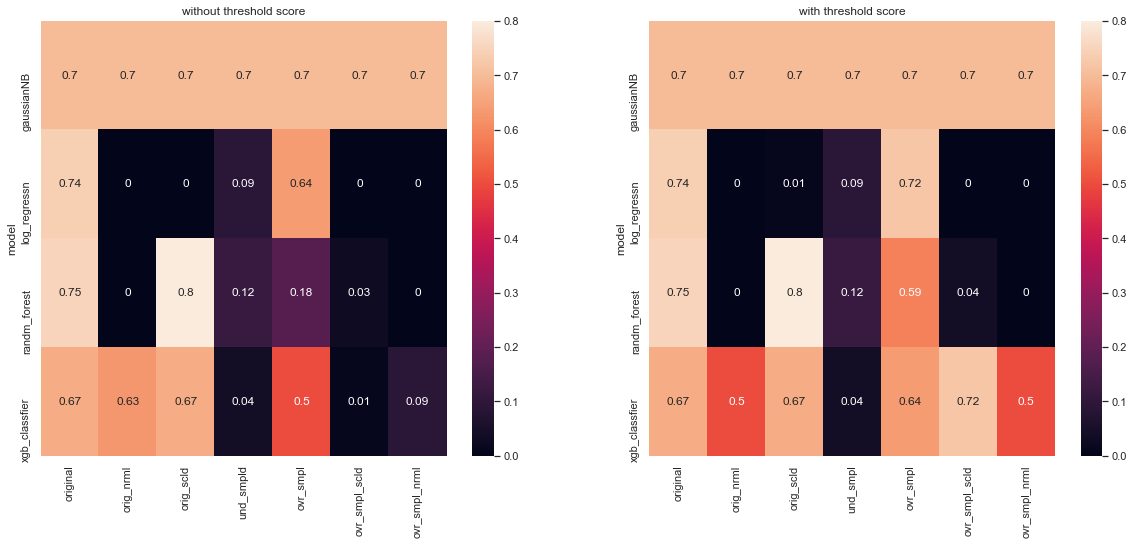

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(20,8))

sns.heatmap(no_IF,ax=axs[0],annot=True)
axs[0].set_title('without threshold score')
sns.heatmap(IF,ax=axs[1],annot=True)
axs[1].set_title('with threshold score')

## ML model with anamoly threshold applied
### applying the anamoly threshold improved correlation of the oversampled data to precision of the models. Thus increasing the sampling of the data a classifier can be built. XGBoost has higher accuracy and precision

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
%matplotlib inline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [140]:
train=pd.read_csv("anamoly_train.csv",header=0,engine="python")
test=pd.read_csv("anamoly_test.csv",header=0,engine="python")

In [47]:
train.shape,test.shape

((5000, 32), (5000, 32))

In [48]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'anamoly', 'Class'],
      dtype='object')

In [57]:
test.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'anamoly', 'Class'],
      dtype='object')

In [141]:
y_train=train.loc[:,'Class']
X_train=train.drop('Class',axis=1)

In [142]:
y_test=test.loc[:,'Class']
X_test=test.drop('Class',axis=1)

In [143]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=0)
X_over,y_over=smt.fit_resample(X_train,y_train)

In [144]:
from collections import Counter
print(Counter(y_over),Counter(y_test))

Counter({0: 4994, 1: 4994}) Counter({0: 4991, 1: 9})


In [146]:
type(X_over),type(y_over)

(numpy.ndarray, numpy.ndarray)

In [127]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_over)

In [131]:
type(y_test)

numpy.ndarray

In [147]:
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [194]:
X_train=X_over.reshape(9988,31,1)
y_train=y_over.reshape(9988,1)
X_test=X_test.reshape(5000,31,1)
y_test=y_test.reshape(5000,1)

In [68]:
ACCURACY_THRESHOLD=0.99
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True
        return logs
# Instantiate a callback object
callbacks = myCallback()

#### SGD Optimizer

In [195]:

fc_size=64
#Initialize model, reshape & normalize data
model_sgd = tf.keras.models.Sequential()

#Add first convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(32, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu',
                                 input_shape=X_train[0].shape))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())
model_sgd.add(tf.keras.layers.Dropout(0.2))



#Add MaxPooling layer
model_sgd.add(tf.keras.layers.MaxPool1D(pool_size=(2),strides=2,padding='valid'))

#Add second convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())
model_sgd.add(tf.keras.layers.Dropout(0.5))

#Add third convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())
model_sgd.add(tf.keras.layers.Dropout(0.5))

#Add fourth convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())
model_sgd.add(tf.keras.layers.Dropout(0.5))

#Flatten the output
model_sgd.add(tf.keras.layers.Flatten())

#Dense layer
model_sgd.add(tf.keras.layers.Dense(fc_size, activation='relu'))

#Add another dropout layer
model_sgd.add(tf.keras.layers.Dropout(0.4))

#Output layer
model_sgd.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_sgd.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [196]:
model_sgd.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 30, 32)            96        
_________________________________________________________________
batch_normalization_40 (Batc (None, 30, 32)            128       
_________________________________________________________________
dropout_25 (Dropout)         (None, 30, 32)            0         
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 15, 32)            0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 14, 64)            4160      
_________________________________________________________________
batch_normalization_41 (Batc (None, 14, 64)            256       
_________________________________________________________________
dropout_26 (Dropout)         (None, 14, 64)          

## Oversampled data obtained by SMOTE resampling 

In [212]:
# fit model
print("SGD binary_crossentropy relu dropout 1000 epochs")
history = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1,batch_size=50,callbacks=[callbacks])


SGD binary_crossentropy relu dropout 1000 epochs
Epoch 1/1000
198/200 [============================>.] - ETA: 0s - loss: 0.0434 - accuracy: 0.9869
Reached 99.00% accuracy, so stopping training!!
200/200 [==============================] - 3s 14ms/step - loss: 0.0431 - accuracy: 0.9870 - val_loss: 0.0182 - val_accuracy: 0.9934


In [213]:
def actual_ypred(x_test):
    act_ypred=[]
    y_pred=model_sgd.predict(X_test)
    for val in y_pred:
        if val[0]<0.9:
            val[0]=0
            act_ypred.append(val[0])
        else:
            val[0]=1
            act_ypred.append(val[0])
    return act_ypred       
ypred_sgd=actual_ypred(X_test)    
len(ypred_sgd)

5000

In [214]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [216]:
print("Classification report for SGD model %s:\n%s\n"
      % (model_sgd.predict, classification_report(y_test, ypred_sgd)))

Classification report for SGD model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fde17b0b978>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.42      0.89      0.57         9

    accuracy                           1.00      5000
   macro avg       0.71      0.94      0.79      5000
weighted avg       1.00      1.00      1.00      5000




SGD binary_crossentropy relu dropout 1000 epochs
SGD binary_crossentropy 100 epochs elu


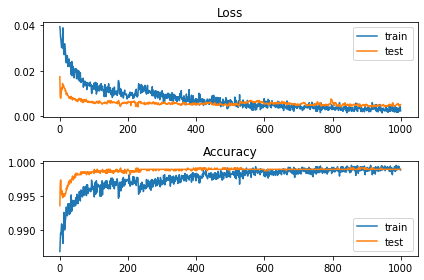

In [217]:
print("SGD binary_crossentropy relu dropout 1000 epochs")
# fit model
history = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0,batch_size=50)
#evaluate the model
print("SGD binary_crossentropy 100 epochs elu")
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.tight_layout()
plt.legend()
plt.show()

In [218]:
ypred_sgd=actual_ypred(X_test)    
len(ypred_sgd)

5000

In [219]:
print("Classification report for SGD model %s:\n%s\n"
      % (model_sgd.predict, classification_report(y_test, ypred_sgd)))

Classification report for SGD model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fde17b0b978>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.75      0.67      0.71         9

    accuracy                           1.00      5000
   macro avg       0.87      0.83      0.85      5000
weighted avg       1.00      1.00      1.00      5000




### 2.5% random subset of training data

In [97]:
X_train.shape

(5000, 31)

In [99]:
X_train=X_train.reshape(5000,31,1)
y_train=y_train.reshape(5000,1)
X_test=X_test.reshape(5000,31,1)
y_test=y_test.reshape(5000,1)

Epoch 1/1000
495/500 [============================>.] - ETA: 0s - loss: 0.0486 - accuracy: 0.9911
Reached 99.00% accuracy, so stopping training!!
500/500 [==============================] - 3s 6ms/step - loss: 0.0482 - accuracy: 0.9912 - val_loss: 0.0144 - val_accuracy: 0.9982
SGD binary_crossentropy 100 epochs elu


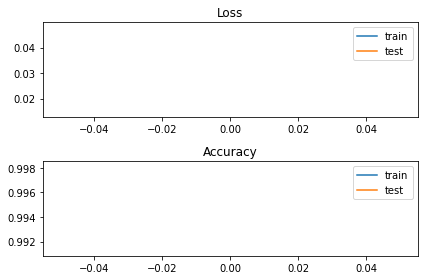

In [100]:
# fit model

history = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1,batch_size=10,callbacks=[callbacks])
# evaluate the model
print("SGD binary_crossentropy 100 epochs elu")
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.tight_layout()
plt.legend()
plt.show()

In [101]:
def actual_ypred(x_test):
    act_ypred=[]
    y_pred=model_sgd.predict(X_test)
    for val in y_pred:
        if val[0]<0.9:
            val[0]=0
            act_ypred.append(val[0])
        else:
            val[0]=1
            act_ypred.append(val[0])
    return act_ypred       
ypred_sgd=actual_ypred(X_test)    
len(ypred_sgd)

5000

In [102]:
print("Classification report for SGD model %s:\n%s\n"
      % (model_sgd.predict, classification_report(y_test, ypred_sgd)))

Classification report for SGD model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fde12e44780>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000




## scaled original data subset

In [111]:
y_train=y_train.to_numpy()

In [114]:
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [108]:
scaler=StandardScaler()
scaled_train=scaler.fit_transform(X_train)

In [115]:
scaled_train.shape,y_train.shape,X_test.shape,y_test.shape

((5000, 31), (5000,), (5000, 31), (5000,))

In [116]:
X_train=scaled_train.reshape(5000,31,1)
y_train=y_train.reshape(5000,1)
X_test=X_test.reshape(5000,31,1)
y_test=y_test.reshape(5000,1)

Epoch 1/1000
492/500 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9988
Reached 99.00% accuracy, so stopping training!!
500/500 [==============================] - 3s 6ms/step - loss: 0.0138 - accuracy: 0.9988 - val_loss: 0.0316 - val_accuracy: 0.9982
SGD binary_crossentropy 100 epochs elu


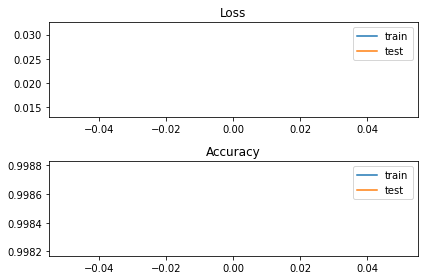

In [117]:
history = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1,batch_size=10,callbacks=[callbacks])
# evaluate the model
print("SGD binary_crossentropy 100 epochs elu")
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.tight_layout()
plt.legend()
plt.show()

In [118]:
ypred_sgd=actual_ypred(X_test)    
len(ypred_sgd)

5000

In [119]:
print("Classification report for SGD model %s:\n%s\n"
      % (model_sgd.predict, classification_report(y_test, ypred_sgd)))

Classification report for SGD model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fde12e44780>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000




## SMOTE oversampled and scaled dataset

In [191]:
print("SGD binary_crossentropy dropout relu 1000 epochs")
history = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1,batch_size=10,callbacks=[callbacks])

SGD binary_crossentropy dropout relu 1000 epochs
Epoch 1/1000
996/999 [============================>.] - ETA: 0s - loss: 7.3359e-05 - accuracy: 1.0000
Reached 99.00% accuracy, so stopping training!!
999/999 [==============================] - 5s 5ms/step - loss: 7.3156e-05 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9992


In [192]:
ypred_sgd=actual_ypred(X_test)    
len(ypred_sgd)

5000

In [193]:
print("Classification report for SGD model %s:\n%s\n"
      % (model_sgd.predict, classification_report(y_test, ypred_sgd)))

Classification report for SGD model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fde2129f6d8>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.86      0.67      0.75         9

    accuracy                           1.00      5000
   macro avg       0.93      0.83      0.87      5000
weighted avg       1.00      1.00      1.00      5000




In [136]:

fc_size=64
#Initialize model, reshape & normalize data
model_sgd = tf.keras.models.Sequential()

#Add first convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(32, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu',
                                 input_shape=X_train[0].shape))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())
model_sgd.add(tf.keras.layers.Dropout(0.2))



#Add MaxPooling layer
model_sgd.add(tf.keras.layers.MaxPool1D(pool_size=(2),strides=2,padding='valid'))

#Add second convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())
model_sgd.add(tf.keras.layers.Dropout(0.5))

#Add third convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())
model_sgd.add(tf.keras.layers.Dropout(0.5))

#Add fourth convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())


#Flatten the output
model_sgd.add(tf.keras.layers.Flatten())

#Dense layer
model_sgd.add(tf.keras.layers.Dense(fc_size, activation='relu'))

#Add another dropout layer

#Output layer
model_sgd.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_sgd.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [137]:
model_sgd.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 30, 32)            96        
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 32)            128       
_________________________________________________________________
dropout_22 (Dropout)         (None, 30, 32)            0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 14, 64)            4160      
_________________________________________________________________
batch_normalization_17 (Batc (None, 14, 64)            256       
_________________________________________________________________
dropout_23 (Dropout)         (None, 14, 64)           

In [190]:
print("SGD binary_crossentropy relu dropout 1000 epochs")
history = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1,batch_size=10,callbacks=[callbacks])

SGD binary_crossentropy relu dropout 1000 epochs
Epoch 1/1000
998/999 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9992
Reached 99.00% accuracy, so stopping training!!
999/999 [==============================] - 5s 5ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 0.0062 - val_accuracy: 0.9994


In [139]:
print("Classification report for SGD model %s:\n%s\n"
      % (model_sgd.predict, classification_report(y_test, ypred_sgd)))

Classification report for SGD model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fde1abfa5f8>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.00      0.00      0.00         9

    accuracy                           1.00      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       1.00      1.00      1.00      5000




## SMOTE oversampled data with no dropout layer in SGD model

In [149]:
fc_size=64
#Initialize model, reshape & normalize data
model_sgd = tf.keras.models.Sequential()

#Add first convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(32, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu',
                                 input_shape=X_train[0].shape))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())



#Add MaxPooling layer
model_sgd.add(tf.keras.layers.MaxPool1D(pool_size=(2),strides=2,padding='valid'))

#Add second convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())

#Add third convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())

#Add fourth convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())


#Flatten the output
model_sgd.add(tf.keras.layers.Flatten())

#Dense layer
model_sgd.add(tf.keras.layers.Dense(fc_size, activation='relu'))



#Output layer
model_sgd.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_sgd.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [150]:
model_sgd.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 30, 32)            96        
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 14, 64)            4160      
_________________________________________________________________
batch_normalization_21 (Batc (None, 14, 64)            256       
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 13, 64)            8256      
_________________________________________________________________
batch_normalization_22 (Batc (None, 13, 64)           

In [187]:
print("SGD binary_crossentropy relu no dropout 1000 epochs")
history = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1,batch_size=10,callbacks=[callbacks])


SGD binary_crossentropy relu no dropout 1000 epochs
Epoch 1/1000
995/999 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 0.9986
Reached 99.00% accuracy, so stopping training!!
999/999 [==============================] - 5s 5ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0064 - val_accuracy: 0.9986


In [188]:
ypred_sgd=actual_ypred(X_test)    
len(ypred_sgd)

5000

In [189]:
print("Classification report for SGD model %s:\n%s\n"
      % (model_sgd.predict, classification_report(y_test, ypred_sgd)))

Classification report for SGD model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fde2129f6d8>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.78      0.78      0.78         9

    accuracy                           1.00      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       1.00      1.00      1.00      5000




In [155]:
fc_size=64
#Initialize model, reshape & normalize data
model_sgd = tf.keras.models.Sequential()

#Add first convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(32, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='swish',
                                 input_shape=X_train[0].shape))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())



#Add MaxPooling layer
model_sgd.add(tf.keras.layers.MaxPool1D(pool_size=(2),strides=2,padding='valid'))

#Add second convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='swish'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())

#Add third convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='swish'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())

#Add fourth convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='swish'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())


#Flatten the output
model_sgd.add(tf.keras.layers.Flatten())

#Dense layer
model_sgd.add(tf.keras.layers.Dense(fc_size, activation='swish'))



#Output layer
model_sgd.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_sgd.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [156]:
model_sgd.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 30, 32)            96        
_________________________________________________________________
batch_normalization_28 (Batc (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 14, 64)            4160      
_________________________________________________________________
batch_normalization_29 (Batc (None, 14, 64)            256       
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 13, 64)            8256      
_________________________________________________________________
batch_normalization_30 (Batc (None, 13, 64)          

## SMOTE oversampled data swish activation function SGD Optimizer

In [183]:
print("SGD binary_crossentropy swish no dropout 1000 epochs")
history = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1,batch_size=10,callbacks=[callbacks])

SGD binary_crossentropy swish no dropout 1000 epochs
Epoch 1/1000
998/999 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9981
Reached 99.00% accuracy, so stopping training!!
999/999 [==============================] - 5s 5ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.0013 - val_accuracy: 0.9998


In [176]:
ypred_sgd=actual_ypred(X_test)    
len(ypred_sgd)

5000

In [177]:
print("Classification report for SGD model %s:\n%s\n"
      % (model_sgd.predict, classification_report(y_test, ypred_sgd)))

Classification report for SGD model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fde179704e0>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.88      0.78      0.82         9

    accuracy                           1.00      5000
   macro avg       0.94      0.89      0.91      5000
weighted avg       1.00      1.00      1.00      5000




In [178]:
fc_size=64
#Initialize model, reshape & normalize data
model_sgd = tf.keras.models.Sequential()

#Add first convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(32, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu',
                                 input_shape=X_train[0].shape))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())



#Add MaxPooling layer
model_sgd.add(tf.keras.layers.MaxPool1D(pool_size=(2),strides=2,padding='valid'))

#Add second convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())

#Add third convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())

#Add fourth convolutional layer
model_sgd.add(tf.keras.layers.Conv1D(64, #Number of filters 
                                 kernel_size=2, #Size of the filter
                                 activation='relu'))
#normalize data
model_sgd.add(tf.keras.layers.BatchNormalization())


#Flatten the output
model_sgd.add(tf.keras.layers.Flatten())

#Dense layer
model_sgd.add(tf.keras.layers.Dense(fc_size, activation='relu'))



#Output layer
model_sgd.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_sgd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [179]:
model_sgd.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 30, 32)            96        
_________________________________________________________________
batch_normalization_36 (Batc (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 15, 32)            0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 14, 64)            4160      
_________________________________________________________________
batch_normalization_37 (Batc (None, 14, 64)            256       
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 13, 64)            8256      
_________________________________________________________________
batch_normalization_38 (Batc (None, 13, 64)          

### SMOTE oversampled data Adam Optimizer

In [180]:
print("Adam binary_crossentropy relu no dropout 1000 epochs")
history = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1,batch_size=10,callbacks=[callbacks])


Adam binary_crossentropy relu no dropout 1000 epochs
Epoch 1/1000
988/999 [============================>.] - ETA: 0s - loss: 0.0175 - accuracy: 0.9947
Reached 99.00% accuracy, so stopping training!!
999/999 [==============================] - 5s 5ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0278 - val_accuracy: 0.9950


In [181]:
ypred_sgd=actual_ypred(X_test)    
len(ypred_sgd)

5000

In [182]:
print("Classification report for SGD model %s:\n%s\n"
      % (model_sgd.predict, classification_report(y_test, ypred_sgd)))

Classification report for SGD model <bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fde2129f6d8>>:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4991
           1       0.32      1.00      0.49         9

    accuracy                           1.00      5000
   macro avg       0.66      1.00      0.74      5000
weighted avg       1.00      1.00      1.00      5000




## ANN model with anamoly threshold

### ANN Models were tried with anamoly threshold. No significant improvement seen compared to models without threshold
### SMOTE oversampling was more significant than the optimizer or the activation function used

<a id='summary'></a>

<a id='summary'></a>

<h1 style="color:blue;font-size:40px;font-style:verdana">Summary</h1>

## ML model and ANN model were developed to detect fraud transactions in banking data